# **Caso Machine Learning League of legends**

Hemos seleccionado un dataset de League of Legends para analizar los datos y explorar la posibilidad de aplicar modelos de machine learning con el fin de predecir resultados.

En cada partida de League of Legends, dos equipos de cinco jugadores (denominados equipo azul y equipo rojo) se enfrentan en un campo de batalla. El objetivo es destruir el Nexus enemigo, que se encuentra en la base del equipo contrario. Para alcanzar este objetivo, los jugadores deben navegar por tres carriles principales (top, mid, bot), así como por la jungla que conecta estas rutas. Cada jugador asume un rol específico, y el éxito del equipo depende de las decisiones estratégicas y la habilidad individual de los jugadores.

Los datos a utilizar corresponden a más de 25,000 partidas clasificatorias en el modo SOLO QUEUE dentro del rango de ELO Platino. Cada partida es única y está identificada por un gameId, lo que permite acceder a datos adicionales utilizando la API de Riot Games. Los datos incluyen características recopiladas en diferentes momentos del juego, desde los primeros 10 minutos hasta el final, proporcionando un total de más de 240,000 registros temporales.

El objetivo de este análisis es explorar las 59 características disponibles para el equipo azul, que incluyen métricas como asesinatos, muertes, oro, experiencia, nivel, entre otras. También se consideran valores booleanos categóricos que indican ciertas condiciones del juego. La variable objetivo hasWon permite abordar un problema de clasificación para predecir el resultado de la partida, mientras que el atributo gameDuration se puede utilizar para predecir la duración del juego.

Este análisis permitirá comprender mejor los factores que influyen en los resultados de las partidas y ofrecerá la oportunidad de realizar ingeniería de características para obtener insights más profundos. La riqueza de los datos abre la puerta a diversas aplicaciones, como la predicción de resultados de juegos o la optimización de estrategias dentro de League of Legends.

| Dato                         | Descripción                                              |
|------------------------------|----------------------------------------------------------|
| gameId                       | Identificador único de la partida.                       |
| gameDuration                 | Duración total de la partida en segundos.                |
| hasWon                       | Indica si el equipo ganó la partida (1) o no (0).        |
| frame                        | Momento específico de la partida, medido en intervalos de tiempo (por ejemplo, 10 minutos, 12 minutos, etc.). |
| goldDiff                     | Diferencia de oro entre los equipos en un momento dado.  |
| expDiff                      | Diferencia de experiencia entre los equipos.             |
| champLevelDiff               | Diferencia en los niveles de los campeones entre equipos.|
| isFirstTower                 | Indica si se destruyó la primera torre (1: sí, 0: no).   |
| isFirstBlood                 | Indica si se consiguió la primera sangre (1: sí, 0: no). |
| killedFireDrake              | Número de dragones de fuego que mató el equipo.          |
| killedWaterDrake             | Número de dragones de agua que mató el equipo.           |
| killedAirDrake               | Número de dragones de aire que mató el equipo.           |
| killedEarthDrake             | Número de dragones de tierra que mató el equipo.         |
| killedElderDrake             | Número de dragones ancianos que mató el equipo.          |
| lostFireDrake                | Número de dragones de fuego perdidos (matados por el enemigo). |
| lostWaterDrake               | Número de dragones de agua perdidos.                     |
| lostAirDrake                 | Número de dragones de aire perdidos.                     |
| lostEarthDrake               | Número de dragones de tierra perdidos.                   |
| lostElderDrake               | Número de dragones ancianos perdidos.                    |
| killedBaronNashor            | Número de veces que se mató al Barón Nashor.             |
| lostBaronNashor              | Número de veces que el enemigo mató al Barón Nashor.     |
| killedRiftHerald             | Número de veces que se mató al Heraldo de la Grieta.     |
| lostRiftHerald               | Número de veces que el enemigo mató al Heraldo de la Grieta. |
| destroyedTopInhibitor        | Número de inhibidores superiores destruidos.             |
| destroyedMidInhibitor        | Número de inhibidores centrales destruidos.              |
| destroyedBotInhibitor        | Número de inhibidores inferiores destruidos.             |
| lostTopInhibitor             | Número de inhibidores superiores perdidos.               |
| lostMidInhibitor             | Número de inhibidores centrales perdidos.                |
| lostBotInhibitor             | Número de inhibidores inferiores perdidos.               |
| destroyedTopNexusTurret      | Número de torretas superiores del nexo destruidas.       |
| destroyedMidNexusTurret      | Número de torretas centrales del nexo destruidas.        |
| destroyedBotNexusTurret      | Número de torretas inferiores del nexo destruidas.       |
| lostTopNexusTurret           | Número de torretas superiores del nexo perdidas.         |
| lostMidNexusTurret           | Número de torretas centrales del nexo perdidas.          |
| lostBotNexusTurret           | Número de torretas inferiores del nexo perdidas.         |
| destroyedTopBaseTurret       | Número de torretas superiores de la base destruidas.     |
| destroyedMidBaseTurret       | Número de torretas centrales de la base destruidas.      |
| destroyedBotBaseTurret       | Número de torretas inferiores de la base destruidas.     |
| lostTopBaseTurret            | Número de torretas superiores de la base perdidas.       |
| lostMidBaseTurret            | Número de torretas centrales de la base perdidas.        |
| lostBotBaseTurret            | Número de torretas inferiores de la base perdidas.       |
| destroyedTopInnerTurret      | Número de torretas interiores superiores destruidas.     |
| destroyedMidInnerTurret      | Número de torretas interiores centrales destruidas.      |
| destroyedBotInnerTurret      | Número de torretas interiores inferiores destruidas.     |
| lostTopInnerTurret           | Número de torretas interiores superiores perdidas.       |
| lostMidInnerTurret           | Número de torretas interiores centrales perdidas.        |
| lostBotInnerTurret           | Número de torretas interiores inferiores perdidas.       |
| destroyedTopOuterTurret      | Número de torretas exteriores superiores destruidas.     |
| destroyedMidOuterTurret      | Número de torretas exteriores centrales destruidas.      |
| destroyedBotOuterTurret      | Número de torretas exteriores inferiores destruidas.     |
| lostTopOuterTurret           | Número de torretas exteriores superiores perdidas.       |
| lostMidOuterTurret           | Número de torretas exteriores centrales perdidas.        |
| lostBotOuterTurret           | Número de torretas exteriores inferiores perdidas.       |
| kills                        | Número de asesinatos realizados por el equipo o jugador. |
| deaths                       | Número de veces que el equipo o jugador murió.           |
| assists                      | Número de asistencias realizadas por el equipo o jugador.|
| wardsPlaced                  | Número de centinelas colocados.                          |
| wardsDestroyed               | Número de centinelas destruidos.                         |
| wardsLost                    | Número de centinelas perdidos.                           |


## **Fase 1: Business Understanding**

In [3]:
import pandas as pd
import arff
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats  
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Funcion para cargar el dataset

def load_arff_dataset(filepath: str) -> pd.DataFrame:
    """
    Load an ARFF dataset and convert it into a Pandas DataFrame.

    Parameters:
    ----------
    filepath : str
        The path to the ARFF file to be loaded.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the data from the ARFF file, with columns 
        named according to the attribute names defined in the ARFF file.

    Raises:
    ------
    FileNotFoundError:
        If the specified file path does not exist.
    ValueError:
        If the ARFF file does not contain valid data.
    """
    with open(filepath, 'r') as f:
        arff_data = arff.load(f)
    
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    
    return df

arff_file_path = '../data/01_raw/dataset'

df = load_arff_dataset(arff_file_path)

In [4]:
# Primeras 10 filas
df.head(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
5,4546233126,1443000,1,20,6127,7606,0.8,1,1,1,...,1,0,1,0,20,14,28,63,9,13
6,4546233126,1443000,1,22,7428,7842,1.4,1,1,1,...,1,0,1,0,23,15,33,75,10,13
7,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,...,1,0,1,0,26,15,36,85,11,14
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
9,4438212663,1241000,1,12,1263,1566,0.4,0,1,0,...,0,0,0,0,7,7,7,20,5,4


In [5]:
# Ultimas 10 filas
df.tail(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
242562,4402156483,1774000,0,20,1440,1464,0.4,1,1,0,...,0,0,1,0,23,17,37,48,11,11
242563,4402156483,1774000,0,22,1291,634,0.2,1,1,0,...,0,0,1,0,25,20,41,54,11,12
242564,4402156483,1774000,0,24,-1321,-2549,-0.4,1,1,0,...,0,0,1,1,29,28,45,57,12,12
242565,4402156483,1774000,0,26,-4062,-5239,-0.8,1,1,1,...,0,0,1,1,30,32,47,67,14,15
242566,4402156483,1774000,0,28,-5640,-9016,-1.0,1,1,1,...,0,0,1,1,33,36,50,74,15,16
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6
242571,4379826739,1013000,0,16,-5601,-7595,-1.2,0,1,0,...,0,0,0,0,11,17,10,31,6,10


In [6]:
# Columna y tipo de dato
columnas = df.columns
for columna in columnas:
    print(f'{columna} es de tipo {df[columna].dtype}')

gameId es de tipo int64
gameDuration es de tipo int64
hasWon es de tipo int64
frame es de tipo int64
goldDiff es de tipo int64
expDiff es de tipo int64
champLevelDiff es de tipo float64
isFirstTower es de tipo int64
isFirstBlood es de tipo int64
killedFireDrake es de tipo int64
killedWaterDrake es de tipo int64
killedAirDrake es de tipo int64
killedEarthDrake es de tipo int64
killedElderDrake es de tipo int64
lostFireDrake es de tipo int64
lostWaterDrake es de tipo int64
lostAirDrake es de tipo int64
lostEarthDrake es de tipo int64
lostElderDrake es de tipo int64
killedBaronNashor es de tipo int64
lostBaronNashor es de tipo int64
killedRiftHerald es de tipo int64
lostRiftHerald es de tipo int64
destroyedTopInhibitor es de tipo int64
destroyedMidInhibitor es de tipo int64
destroyedBotInhibitor es de tipo int64
lostTopInhibitor es de tipo int64
lostMidInhibitor es de tipo int64
lostBotInhibitor es de tipo int64
destroyedTopNexusTurret es de tipo int64
destroyedMidNexusTurret es de tipo i

In [7]:
num_filas = df.shape[0]
print(f'El dataset tiene {num_filas} filas.')

El dataset tiene 242572 filas.


 # Hipótesis

De acuerdo con los datos que se pueden apreciar, se podría trabajar bajo las siguientes hipótesis:

* ¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?
* Predicción de serie temporal
* ¿El número de asesinatos (Kills) y asistencias (Assist) durante los primeros 10 minutos (frame) tiene un impacto significativo en la victoria de un              equipo?
* ¿Conseguir la Primera Sangre incrementa las posibilidades de ganar la partida?


## **Fase 2: Data Understanding**

### Verificación de datos nulos

In [8]:
df.isnull().sum()

gameId                     0
gameDuration               0
hasWon                     0
frame                      0
goldDiff                   0
expDiff                    0
champLevelDiff             0
isFirstTower               0
isFirstBlood               0
killedFireDrake            0
killedWaterDrake           0
killedAirDrake             0
killedEarthDrake           0
killedElderDrake           0
lostFireDrake              0
lostWaterDrake             0
lostAirDrake               0
lostEarthDrake             0
lostElderDrake             0
killedBaronNashor          0
lostBaronNashor            0
killedRiftHerald           0
lostRiftHerald             0
destroyedTopInhibitor      0
destroyedMidInhibitor      0
destroyedBotInhibitor      0
lostTopInhibitor           0
lostMidInhibitor           0
lostBotInhibitor           0
destroyedTopNexusTurret    0
destroyedMidNexusTurret    0
destroyedBotNexusTurret    0
lostTopNexusTurret         0
lostMidNexusTurret         0
lostBotNexusTu

Podemos notar que dentro del dataset no existen valores nulos.

In [9]:
df.nunique()

gameId                     24912
gameDuration                2074
hasWon                         2
frame                         24
goldDiff                   28629
expDiff                    28949
champLevelDiff               123
isFirstTower                   2
isFirstBlood                   2
killedFireDrake                5
killedWaterDrake               5
killedAirDrake                 5
killedEarthDrake               5
killedElderDrake               4
lostFireDrake                  5
lostWaterDrake                 5
lostAirDrake                   5
lostEarthDrake                 5
lostElderDrake                 4
killedBaronNashor              5
lostBaronNashor                5
killedRiftHerald               3
lostRiftHerald                 3
destroyedTopInhibitor          4
destroyedMidInhibitor          4
destroyedBotInhibitor          5
lostTopInhibitor               4
lostMidInhibitor               4
lostBotInhibitor               5
destroyedTopNexusTurret        2
destroyedM

In [10]:
# Lista para almacenar los nombres de las columnas con números negativos
columnas_con_negativos = []

# Iterar sobre cada columna y verificar si contiene números negativos
for columna in df.columns:
    if (df[columna] < 0).any():
        columnas_con_negativos.append(columna)

print("Columnas con números negativos:", columnas_con_negativos)

Columnas con números negativos: ['goldDiff', 'expDiff', 'champLevelDiff']


Las columnas que contienen números negativos están correctas, ya que dentro del juego es posible que existan diferencias negativas tanto en oro como en experiencia o en el nivel del personaje.

### Medidas de Posición

In [11]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


In [12]:
for dato in df.columns:
    media = df[dato].mean()
    moda = df[dato].mode()[0] if not df[dato].mode().empty else 'No hay moda'
    mediana = df[dato].median()
    desviacion = df[dato].std()
    print(f"Columna: {dato}")
    print(f" - Media: {media}")
    print(f" - Moda: {moda}")
    print(f" - Mediana: {mediana}")
    print(f" - Desviación Estándar: {desviacion}\n")


Columna: gameId
 - Media: 4501479546.200077
 - Moda: 4361896408
 - Mediana: 4529395251.0
 - Desviación Estándar: 53316927.63205334

Columna: gameDuration
 - Media: 1785493.8945962435
 - Moda: 1775000
 - Mediana: 1774000.0
 - Desviación Estándar: 376190.06291678606

Columna: hasWon
 - Media: 0.4981283907458404
 - Moda: 0
 - Mediana: 0.0
 - Desviación Estándar: 0.4999975276843313

Columna: frame
 - Media: 19.811264284418648
 - Moda: 10
 - Mediana: 18.0
 - Desviación Estándar: 7.197338964616284

Columna: goldDiff
 - Media: -11.413811157099747
 - Moda: 647
 - Mediana: 24.0
 - Desviación Estándar: 5438.051920127789

Columna: expDiff
 - Media: -215.01935095559256
 - Moda: -589
 - Mediana: -123.0
 - Desviación Estándar: 5261.880802086872

Columna: champLevelDiff
 - Media: -0.0265166630938443
 - Moda: 0.0
 - Mediana: 0.0
 - Desviación Estándar: 0.7723658247149056

Columna: isFirstTower
 - Media: 0.6177093811322
 - Moda: 1
 - Mediana: 1.0
 - Desviación Estándar: 0.4859480168703304

Columna: isF

### Gráficos

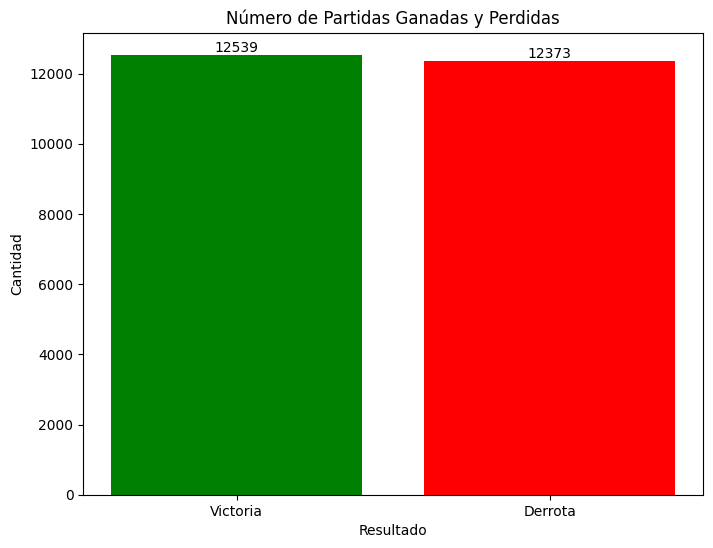

In [13]:
# Agrupar por 'gameId' y sumar las victorias
resultados_por_juego = df.groupby('gameId')['hasWon'].sum().reset_index()

# Determinar si la partida fue ganada o perdida
resultados_por_juego['Resultado'] = resultados_por_juego['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Contar el número de partidas ganadas y perdidas
conteo_resultados = resultados_por_juego['Resultado'].value_counts().reset_index()
conteo_resultados.columns = ['Resultado', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(conteo_resultados['Resultado'], conteo_resultados['Cantidad'], color=['green', 'red'])

# Añadir los números encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, int(altura), ha='center', va='bottom')

plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.title('Número de Partidas Ganadas y Perdidas')
plt.show()


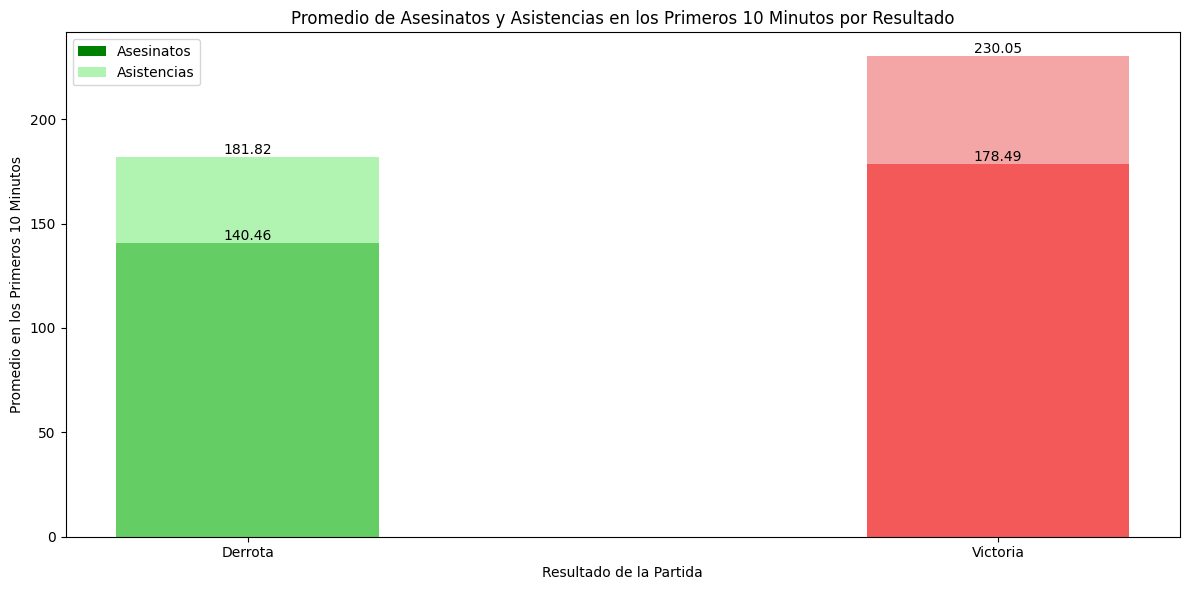

Total de partidas analizadas: 24912
Victorias: 12539 (50.33%)
Derrotas: 12373 (49.67%)

Estadísticas de los primeros 10 minutos:
                kills     assists
Resultado                        
Derrota    140.463267  181.817506
Victoria   178.494138  230.054869

Correlación entre asesinatos y victoria: 0.4233
Correlación entre asistencias y victoria: 0.3971


In [14]:
# Filtrar los datos para los primeros 10 minutos (600 segundos)
df_early = df[df['frame'] <= 600]

# Agrupar por 'gameId' y sumar kills, assists y hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determinar si la partida fue ganada o perdida
early_game_stats['Resultado'] = early_game_stats['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Calcular la media de kills y assists para partidas ganadas y perdidas
mean_stats = early_game_stats.groupby('Resultado')[['kills', 'assists']].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Barras para kills
barras_kills = plt.bar(mean_stats['Resultado'], mean_stats['kills'], width=0.35, label='Asesinatos', color=['green', 'red'])
# Barras para assists
barras_assists = plt.bar(mean_stats['Resultado'], mean_stats['assists'], width=0.35, label='Asistencias', color=['lightgreen', 'lightcoral'], alpha=0.7)

# Añadir los números encima de las barras
for barras in [barras_kills, barras_assists]:
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura:.2f}', ha='center', va='bottom')

plt.xlabel('Resultado de la Partida')
plt.ylabel('Promedio en los Primeros 10 Minutos')
plt.title('Promedio de Asesinatos y Asistencias en los Primeros 10 Minutos por Resultado')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular y mostrar estadísticas adicionales
total_games = len(early_game_stats)
victories = early_game_stats['Resultado'].value_counts()['Victoria']
defeats = total_games - victories

print(f"Total de partidas analizadas: {total_games}")
print(f"Victorias: {victories} ({victories/total_games*100:.2f}%)")
print(f"Derrotas: {defeats} ({defeats/total_games*100:.2f}%)")

print("\nEstadísticas de los primeros 10 minutos:")
print(early_game_stats.groupby('Resultado')[['kills', 'assists']].mean())

# Calcular la correlación entre kills/assists y victoria
correlation_kills = early_game_stats['kills'].corr(early_game_stats['hasWon'])
correlation_assists = early_game_stats['assists'].corr(early_game_stats['hasWon'])

print(f"\nCorrelación entre asesinatos y victoria: {correlation_kills:.4f}")
print(f"Correlación entre asistencias y victoria: {correlation_assists:.4f}")

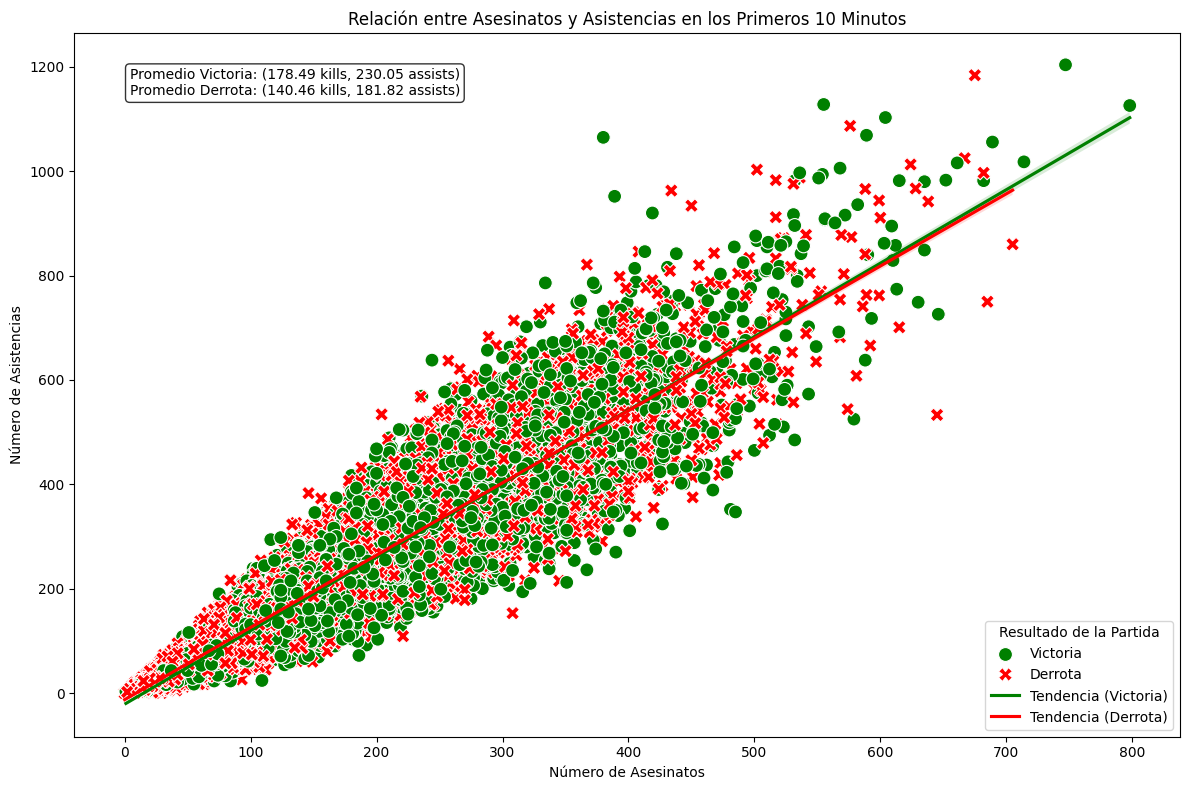

Correlaciones para partidas ganadas:
            kills   assists
kills    1.000000  0.914643
assists  0.914643  1.000000

Correlaciones para partidas perdidas:
            kills   assists
kills    1.000000  0.939336
assists  0.939336  1.000000

Prueba t para kills: t-statistic = 31.4574, p-value = 0.0000
Prueba t para assists: t-statistic = 26.5089, p-value = 0.0000


In [15]:
# Filtrar los datos para los primeros 10 minutos (600 segundos)
df_early = df[df['frame'] <= 600]

# Agrupar por 'gameId' y sumar kills, assists y hasWon
early_game_stats = df_early.groupby('gameId').agg({
    'kills': 'sum',
    'assists': 'sum',
    'hasWon': 'sum'
}).reset_index()

# Determinar si la partida fue ganada o perdida
early_game_stats['Resultado'] = early_game_stats['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=early_game_stats, x='kills', y='assists', hue='Resultado', 
                          style='Resultado', s=100, palette={'Victoria': 'green', 'Derrota': 'red'})

# Añadir una línea de regresión para cada grupo
sns.regplot(data=early_game_stats[early_game_stats['Resultado'] == 'Victoria'], 
            x='kills', y='assists', scatter=False, color='green', label='Tendencia (Victoria)')
sns.regplot(data=early_game_stats[early_game_stats['Resultado'] == 'Derrota'], 
            x='kills', y='assists', scatter=False, color='red', label='Tendencia (Derrota)')

plt.title('Relación entre Asesinatos y Asistencias en los Primeros 10 Minutos')
plt.xlabel('Número de Asesinatos')
plt.ylabel('Número de Asistencias')
plt.legend(title='Resultado de la Partida')

# Añadir texto con estadísticas
victoria = early_game_stats[early_game_stats['Resultado'] == 'Victoria']
derrota = early_game_stats[early_game_stats['Resultado'] == 'Derrota']

stats_text = f"Promedio Victoria: ({victoria['kills'].mean():.2f} kills, {victoria['assists'].mean():.2f} assists)\n"
stats_text += f"Promedio Derrota: ({derrota['kills'].mean():.2f} kills, {derrota['assists'].mean():.2f} assists)"

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Calcular y mostrar correlaciones
print("Correlaciones para partidas ganadas:")
print(victoria[['kills', 'assists']].corr())
print("\nCorrelaciones para partidas perdidas:")
print(derrota[['kills', 'assists']].corr())

# Realizar prueba t para kills y assists
from scipy import stats

t_stat_kills, p_value_kills = stats.ttest_ind(victoria['kills'], derrota['kills'])
t_stat_assists, p_value_assists = stats.ttest_ind(victoria['assists'], derrota['assists'])

print(f"\nPrueba t para kills: t-statistic = {t_stat_kills:.4f}, p-value = {p_value_kills:.4f}")
print(f"Prueba t para assists: t-statistic = {t_stat_assists:.4f}, p-value = {p_value_assists:.4f}")

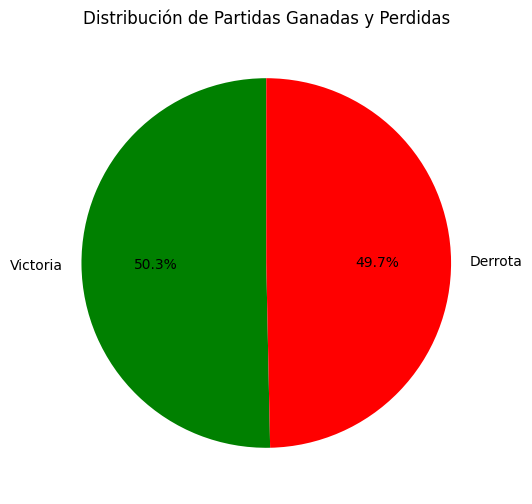

In [16]:
df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]

#Calcular la distribución de victorias y derrotas directamente
victorias = df_last_frame['hasWon'].sum()
derrotas = len(df_last_frame) - victorias

#Preparar los datos para el gráfico de pastel
labels = ['Victoria', 'Derrota']
sizes = [victorias, derrotas]
colors = ['green', 'red']  # 'green' para victorias y 'red' para derrotas

#Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de Partidas Ganadas y Perdidas')
plt.ylabel('')
plt.show()


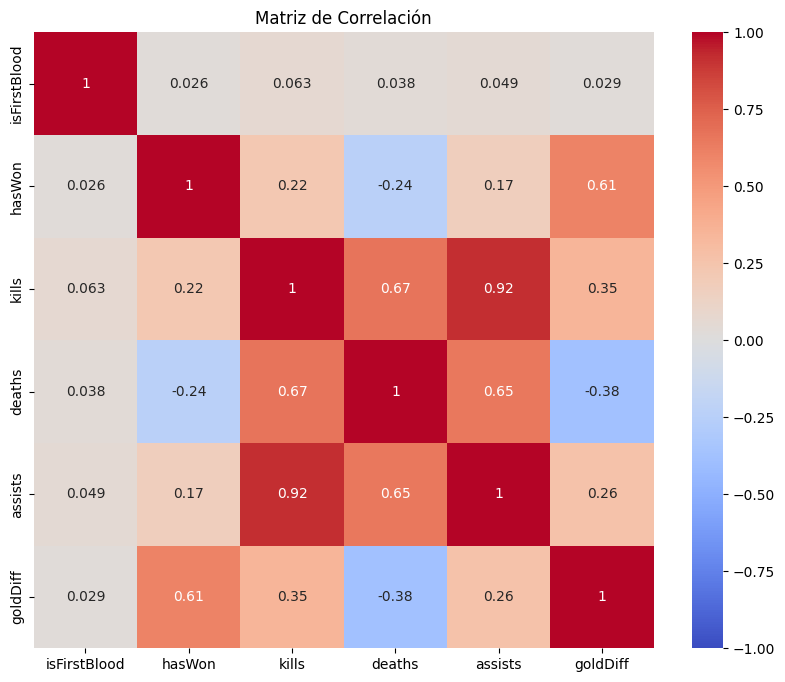

In [17]:
# Correlación entre variables relevantes
correlation_vars = ['isFirstBlood', 'hasWon', 'kills', 'deaths', 'assists', 'goldDiff']
correlation_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


## **Fase 3: Data Preparation**

Para trabajar en la preparación de los datos, se llevará a cabo la limpieza y el procesamiento de acuerdo con las necesidades específicas de cada hípotesis.

### **¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?**

### **Seleccion de variables:**

In [18]:
def used_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects and returns relevant columns from a given DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which relevant columns will be selected.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the relevant columns: 
        ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
         'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
         'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
         'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
         'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
         'lostRiftHerald'].

    Raises:
    ------
    KeyError:
        If any of the specified columns are not present in the input DataFrame.
    """
    
    # Define the relevant columns
    columns = ['gameId', 'hasWon', 'frame', 'killedFireDrake', 
               'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake', 
               'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
               'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 
               'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
               'lostRiftHerald']
    
    # Select the relevant columns
    df_relevant = df[columns]
    
    return df_relevant

# Create a copy of the original DataFrame
df_cp = df.copy()


df_cp = df.copy()

df_use = used_columns(df_cp)

df_use.head()


,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
0,4546233126,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4546233126,1,12,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,4546233126,1,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,4546233126,1,16,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,4546233126,1,18,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [19]:
# Seleciona el ultimo frame de tiempo de cada partida para tener los valores finales de cada columna
def select_last_frame(df: pd.DataFrame) -> pd.DataFrame:
    """
    Selects the last frame for each game in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing game data, which includes 'gameId' and 'frame' columns.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing only the last frame for each game, identified by 'gameId'.

    Notes:
    ------
    The function assumes that the DataFrame contains a 'frame' column that can be used to determine 
    the last frame for each 'gameId'.
    """
    
    # Select the last frame for each game
    df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]
    
    return df_last_frame

df_last_frame = select_last_frame(df_use)

# Mostrar el DataFrame resultante
df_last_frame.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
186421,4357970300,1,34,0,1,1,1,0,0,0,2,0,0,2,0,1,1
176926,4357978575,0,26,0,0,0,0,0,2,0,1,1,0,0,1,0,2
122571,4358313595,0,24,1,0,1,0,0,0,2,0,0,0,0,1,0,2
233782,4358316661,0,20,0,0,0,0,0,1,1,1,0,0,0,0,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,0,0,0,1,0,1,0


### **Generando nuevas variables:**


In [20]:
#    Genera nuevas variables a partir de los objetivos neutrales.

def create_new_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generates new variables based on neutral objectives in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing neutral objectives data.

    Returns:
    -------
    pd.DataFrame
        The original DataFrame with additional columns representing totals 
        of killed and lost neutral objectives.

    New Columns:
    ------------
    - totalDragonsKilled: Total number of dragons killed (sum of individual drakes).
    - totalDragonsLost: Total number of dragons lost (sum of individual drakes lost).
    - totalObjectivesKilled: Total number of objectives killed (sum of Baron Nashor and Rift Herald).
    - totalObjectivesLost: Total number of objectives lost (sum of lost Baron Nashor and Rift Herald).
    """
    
    # Generate new columns based on neutral objectives
    df['totalDragonsKilled'] = (df['killedFireDrake'] + df['killedWaterDrake'] + 
                                df['killedAirDrake'] + df['killedEarthDrake'] +
                                df['killedElderDrake'])
    df['totalDragonsLost'] = (df['lostFireDrake'] + df['lostWaterDrake'] + 
                              df['lostAirDrake'] + df['lostEarthDrake'] + 
                              df['lostElderDrake'])
    df['totalObjectivesKilled'] = (df['killedBaronNashor'] + df['killedRiftHerald'])
    df['totalObjectivesLost'] = (df['lostBaronNashor'] + df['lostRiftHerald'])
    
    return df

df_ncolum = create_new_columns(df_last_frame)
df_ncolum.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,...,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,totalDragonsKilled,totalDragonsLost,totalObjectivesKilled,totalObjectivesLost
186421,4357970300,1,34,0,1,1,1,0,0,0,...,0,0,2,0,1,1,3,2,3,1
176926,4357978575,0,26,0,0,0,0,0,2,0,...,1,0,0,1,0,2,0,4,0,3
122571,4358313595,0,24,1,0,1,0,0,0,2,...,0,0,0,1,0,2,2,2,0,3
233782,4358316661,0,20,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,3,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,...,0,0,1,0,1,0,4,0,2,0


### **Gráfico:**


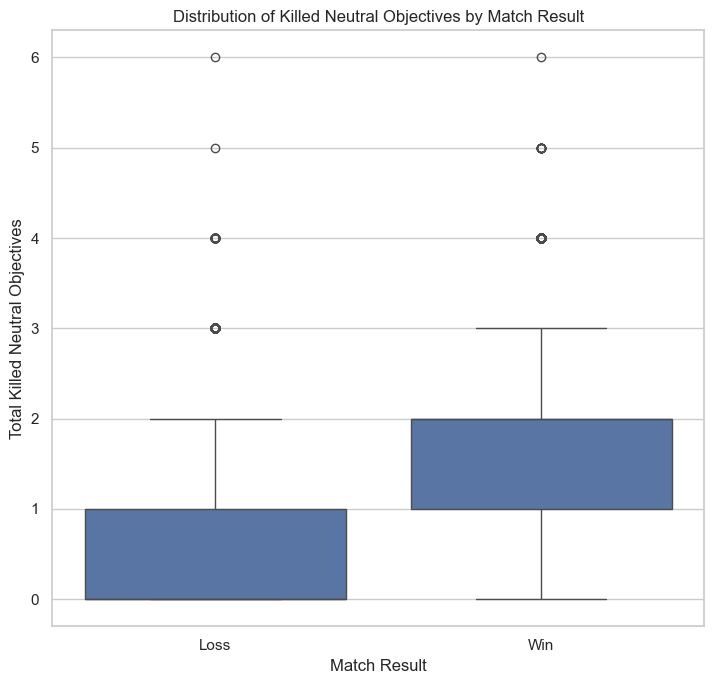

In [21]:
#    Crea un gráfico para visualizar la distribución de objetivos neutrales matados por resultado del partido.

def plot_neutral_objectives_wins(df: pd.DataFrame) -> None:
    """
    Creates a boxplot to visualize the distribution of neutral objectives killed
    based on the match result (win or loss).

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the match results and neutral objectives data.

    Returns:
    -------
    None
        This function does not return any value; it displays a plot.
    """
    
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='hasWon', y='totalObjectivesKilled', data=df)
    
    # Customize axes and title
    plt.title('Distribution of Killed Neutral Objectives by Match Result')
    plt.xlabel('Match Result')
    plt.ylabel('Total Killed Neutral Objectives')
    
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    
    plt.tight_layout()
    plt.show()

plot_neutral_objectives_wins(df_ncolum)



In [22]:
#Calcula el promedio y la desviación estándar para los objetivos neutrales.

def calculate_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the mean and standard deviation for neutral objectives in the DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing data about neutral objectives.

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the mean and standard deviation for specified columns.
    """
    
    columns = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
               'killedEarthDrake', 'killedElderDrake', 'lostFireDrake',
               'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake', 'lostElderDrake',
               'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald', 
               'lostRiftHerald', 'totalDragonsKilled', 'totalObjectivesKilled',
               'totalDragonsLost', 'totalObjectivesLost']
    
    # Calculate the mean and standard deviation
    statistics = {
        'Mean': df[columns].mean(),
        'Standard Deviation': df[columns].std()
    }
    
    # Create a DataFrame for the statistics
    df_statistics = pd.DataFrame(statistics)
    
    return df_statistics

# Suponiendo que df_with_features es tu DataFrame con datos relevantes
df_stats= calculate_statistics(df_ncolum)
print(df_stats)


                           Mean  Standard Deviation
killedFireDrake        0.451549            0.647978
killedWaterDrake       0.459136            0.656009
killedAirDrake         0.456487            0.651417
killedEarthDrake       0.461103            0.658937
killedElderDrake       0.025450            0.166413
lostFireDrake          0.462749            0.658301
lostWaterDrake         0.477079            0.663024
lostAirDrake           0.471299            0.661526
lostEarthDrake         0.480170            0.674587
lostElderDrake         0.027015            0.170341
killedBaronNashor      0.428468            0.611155
lostBaronNashor        0.479006            0.639356
killedRiftHerald       0.749037            0.730657
lostRiftHerald         0.869099            0.739101
totalDragonsKilled     1.853725            1.335691
totalObjectivesKilled  1.177505            1.018260
totalDragonsLost       1.918312            1.363175
totalObjectivesLost    1.348105            1.058090


In [23]:
#    Calcula la correlación entre los objetivos neutrales y el resultado del partido.
def calculate_correlation_with_victories(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the correlation between neutral objectives and the match result.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing data about neutral objectives and match outcomes.

    Returns:
    -------
    pd.Series
        A Series containing the correlation coefficients of the specified columns with the match result.
    """
    
    correlations = df.corr()['hasWon'].sort_values(ascending=False)
    return correlations

correlations = calculate_correlation_with_victories(df_ncolum)
print(correlations)


hasWon                   1.000000
totalDragonsKilled       0.570796
totalObjectivesKilled    0.495964
killedBaronNashor        0.440796
killedRiftHerald         0.322485
killedFireDrake          0.299475
killedWaterDrake         0.292733
killedEarthDrake         0.288305
killedAirDrake           0.263026
killedElderDrake         0.090164
gameId                   0.006712
frame                   -0.031334
lostElderDrake          -0.106398
lostAirDrake            -0.271083
lostEarthDrake          -0.301090
lostWaterDrake          -0.308672
lostFireDrake           -0.310071
lostRiftHerald          -0.322799
lostBaronNashor         -0.484368
totalObjectivesLost     -0.518164
totalDragonsLost        -0.593717
Name: hasWon, dtype: float64


### **Tratamiento de outliers:**


Existen ciertos outliers que podrían tener un impacto en nuestros análisis. Por esta razón, procederemos a realizar un tratamiento de estos valores atípicos para asegurar la integridad y precisión de nuestros resultados.

In [24]:
def detect_outliers_z_score(df: pd.DataFrame, columns: list, threshold: float = 3) -> pd.DataFrame:
    """
    Detects outliers in the specified columns of the DataFrame using Z-score method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data to analyze.
    
    columns : list
        List of column names in which to detect outliers.
    
    threshold : float, optional
        The Z-score threshold above which a value is considered an outlier (default is 3).

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing all detected outliers across specified columns.
    """
    
    total_outliers = pd.DataFrame()
    
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers_column = df[z_scores > threshold]
        
        if not outliers_column.empty:
            total_outliers = pd.concat([total_outliers, outliers_column], axis=0).drop_duplicates()
        
        print(f"Outliers for {col} using Z-score:")
        print(outliers_column)
        print("\n")
    
    return total_outliers

# Specify the columns to check for outliers
columns_to_check = ['totalObjectivesKilled']

# Detect outliers using df_ncolum
outliers_detected = detect_outliers_z_score(df_ncolum, columns_to_check)

Outliers for totalObjectivesKilled using Z-score:
            gameId  hasWon  frame  killedFireDrake  killedWaterDrake  \
133580  4362093373       0     42                0                 2   
143942  4415538020       1     38                1                 0   
88139   4433556245       0     42                1                 0   
50733   4476668517       1     42                1                 1   
162601  4509311465       1     40                1                 0   
202801  4513077237       1     44                1                 1   
190170  4514529387       1     38                1                 0   
171026  4516310710       1     38                0                 0   
19225   4527108075       1     44                2                 0   
56674   4538543693       1     40                0                 1   
179709  4541037662       1     40                0                 0   
125958  4543509569       1     36                0                 1   
110994  454455

In [25]:
def remove_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the Z-score method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    column : str
        The name of the column in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified column.
    """
    
    # Calculate Z-scores for the specified column
    z_scores = stats.zscore(df[column].dropna())
    
    # Set the threshold for defining outliers
    threshold = 3
    
    # Identify outliers
    outliers = df[abs(z_scores) > threshold]
    
    # Remove outliers from the DataFrame
    df_without_outliers = df[~df[column].isin(outliers[column])]
    
    print("DataFrame after removing outliers for '{}':".format(column))
    print(df_without_outliers.describe())
    
    return df_without_outliers

# Example usage
df_without_outliers = remove_outliers(df_ncolum, 'totalObjectivesKilled')


DataFrame after removing outliers for 'totalObjectivesKilled':
             gameId        hasWon         frame  killedFireDrake  \
count  2.489600e+04  24896.000000  24896.000000     24896.000000   
mean   4.500423e+09      0.503093     27.465938         0.451438   
std    5.374381e+07      0.500000      6.461489         0.647993   
min    4.357970e+09      0.000000     10.000000         0.000000   
25%    4.460547e+09      0.000000     24.000000         0.000000   
50%    4.528185e+09      1.000000     28.000000         0.000000   
75%    4.543621e+09      1.000000     32.000000         1.000000   
max    4.547671e+09      1.000000     56.000000         4.000000   

       killedWaterDrake  killedAirDrake  killedEarthDrake  killedElderDrake  \
count      24896.000000    24896.000000      24896.000000      24896.000000   
mean           0.458989        0.456138          0.460958          0.025386   
std            0.655783        0.651049          0.658775          0.166236   
min     

In [26]:
def remove_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame from which to remove outliers.
    
    column : str
        The name of the column in which to detect and remove outliers.

    Returns:
    -------
    pd.DataFrame
        A DataFrame without the outliers from the specified column.
    """
    
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    df_without_outliers = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df_without_outliers

# Example usage
df_without_outliers_iqr = remove_outliers_iqr(df_ncolum, 'totalObjectivesKilled')

In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

def replace_outliers_with_knn(df: pd.DataFrame, column: str, n_neighbors: int = 5) -> pd.DataFrame:
    """
    Replaces outliers in a specified column of the DataFrame using KNN imputation instead of removing them.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    column : str
        The name of the column from which to replace outliers.
    
    n_neighbors : int, optional
        The number of neighbors to use for KNN imputation (default is 5).

    Returns:
    -------
    pd.DataFrame
        A DataFrame with outliers replaced by KNN imputed values.
    """
    
    # Calculate the first and third quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers (True for values that are outliers)
    is_outlier = (df[column] < lower_limit) | (df[column] > upper_limit)
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Replace outliers with NaN
    df_copy.loc[is_outlier, column] = np.nan
    
    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns=df_copy.columns)
    
    return df_imputed

# Example usage
df_with_replaced_outliers = replace_outliers_with_knn(df_ncolum, 'totalObjectivesKilled')


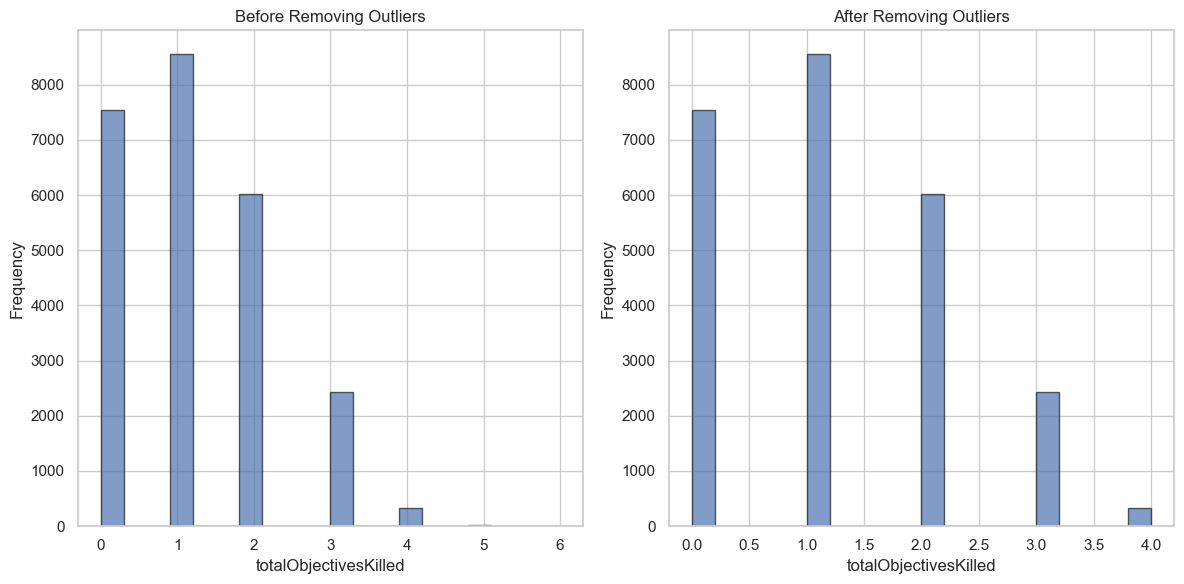

In [28]:
def plot_before_and_after(df_before: pd.DataFrame, df_after: pd.DataFrame, column_name: str) -> None:
    """
    Generates histograms to compare the distribution of a specified column 
    before and after removing outliers.

    Parameters:
    ----------
    df_before : pd.DataFrame
        The DataFrame containing the data before outlier removal.
    
    df_after : pd.DataFrame
        The DataFrame containing the data after outlier removal.
    
    column_name : str
        The name of the column to be visualized in the histograms.
    """
    
    plt.figure(figsize=(12, 6))

    # Data before removing outliers
    plt.subplot(1, 2, 1)
    plt.hist(df_before[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Before Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Data after removing outliers
    plt.subplot(1, 2, 2)
    plt.hist(df_after[column_name], bins=20, edgecolor='k', alpha=0.7)
    plt.title('After Removing Outliers')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Example usage
plot_before_and_after(df_ncolum, df_without_outliers, 'totalObjectivesKilled')


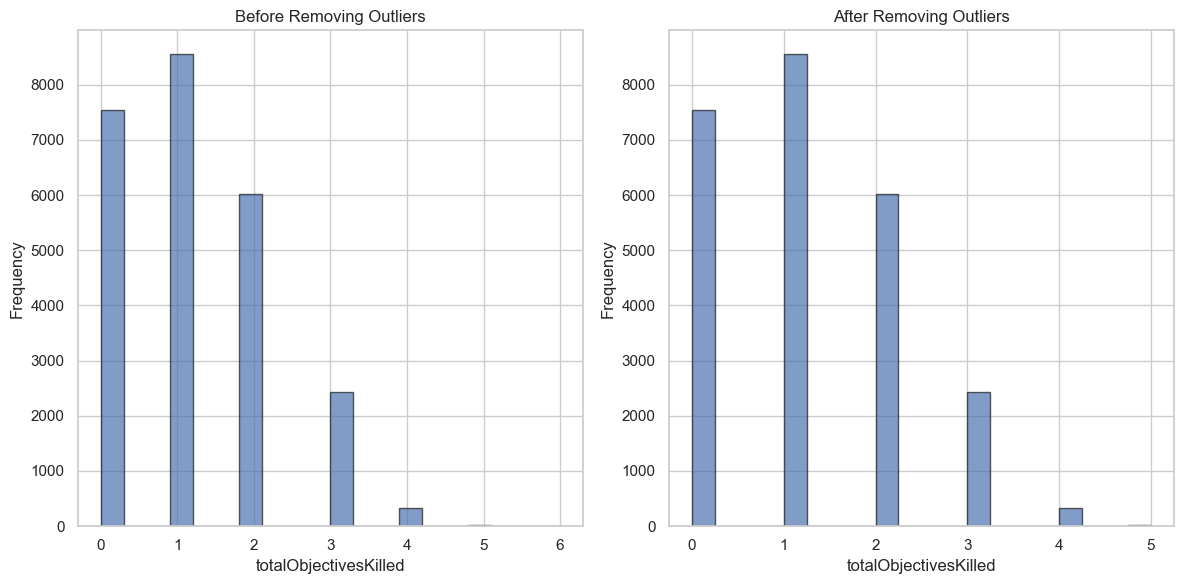

In [29]:
plot_before_and_after(df_ncolum, df_without_outliers_iqr, 'totalObjectivesKilled')


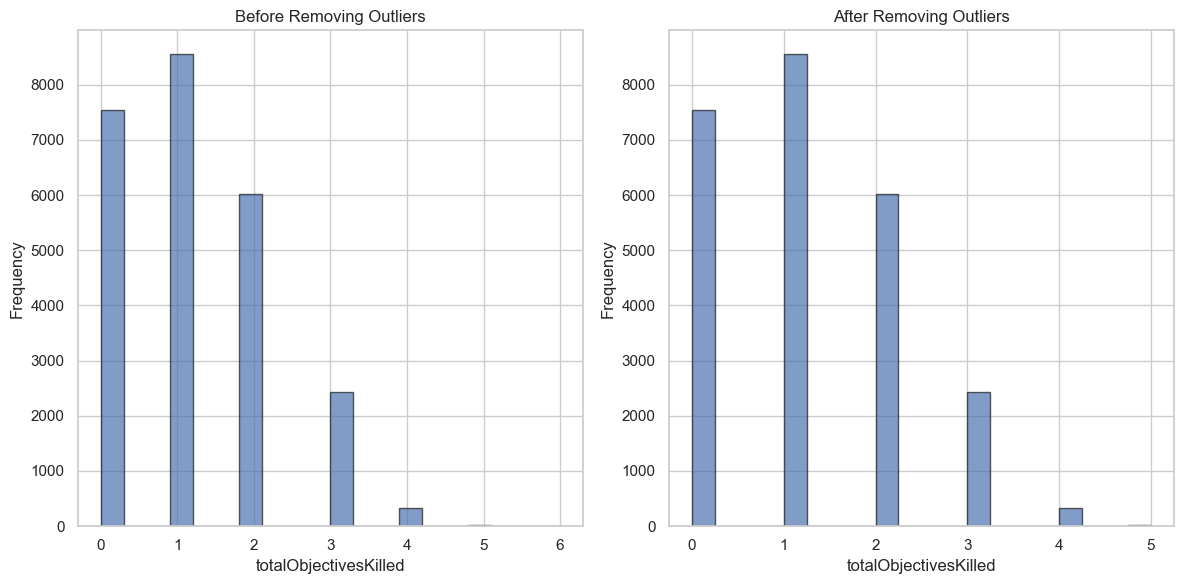

In [30]:
plot_before_and_after(df_ncolum, df_with_replaced_outliers, 'totalObjectivesKilled')


### **Resumen:**

Al comparar los métodos (sin tratamiento, eliminación de outliers mediante IQR, reemplazo de outliers con KNN y eliminación utilizando Z-scores), no se observa una diferencia significativa en la distribución de los datos. Incluso con la eliminación de outliers basada en Z-scores, con un umbral de 3, la estructura general de los datos se mantiene. Esto indica que los valores atípicos no tienen un impacto considerable en la distribución, por lo que cualquiera de las estrategias puede ser empleada sin alterar de forma significativa los resultados.

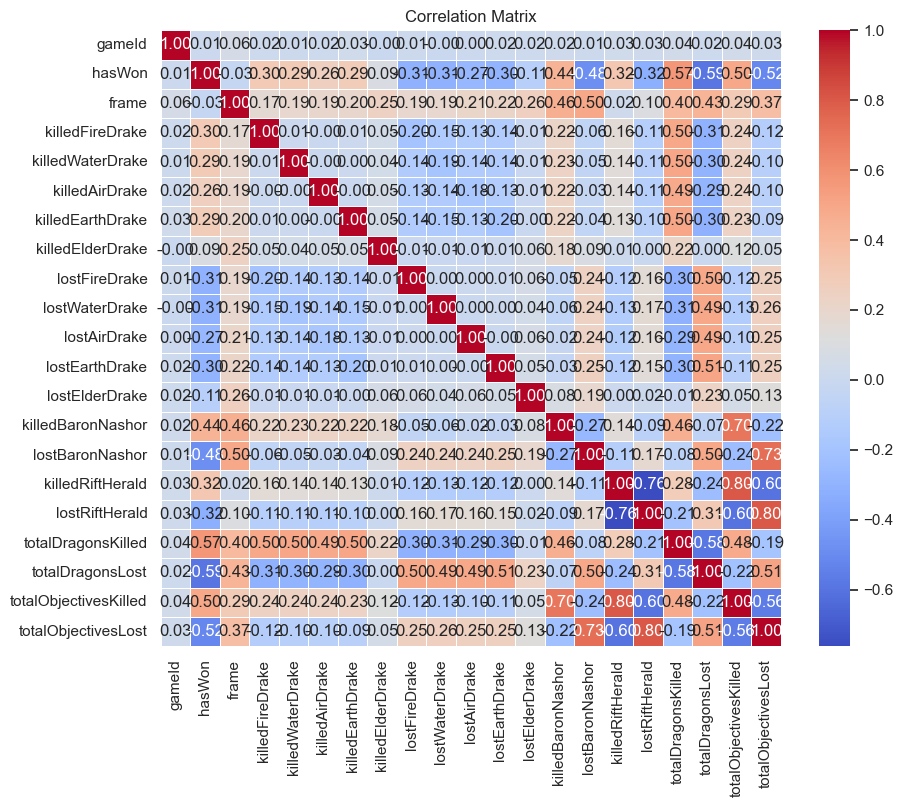

In [31]:
def correlation_matrix(df: pd.DataFrame) -> None:
    """
    Generates a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame for which to compute and visualize the correlation matrix.
    """
    
    # Calculate the correlation matrix
    correlations = df.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))  # Adjust the figure size
    
    # Create a heatmap with annotations
    sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    
    # Set the title of the heatmap
    plt.title('Correlation Matrix')
    
    # Show the plot
    plt.show()

# Example usage
correlation_matrix(df_with_replaced_outliers)

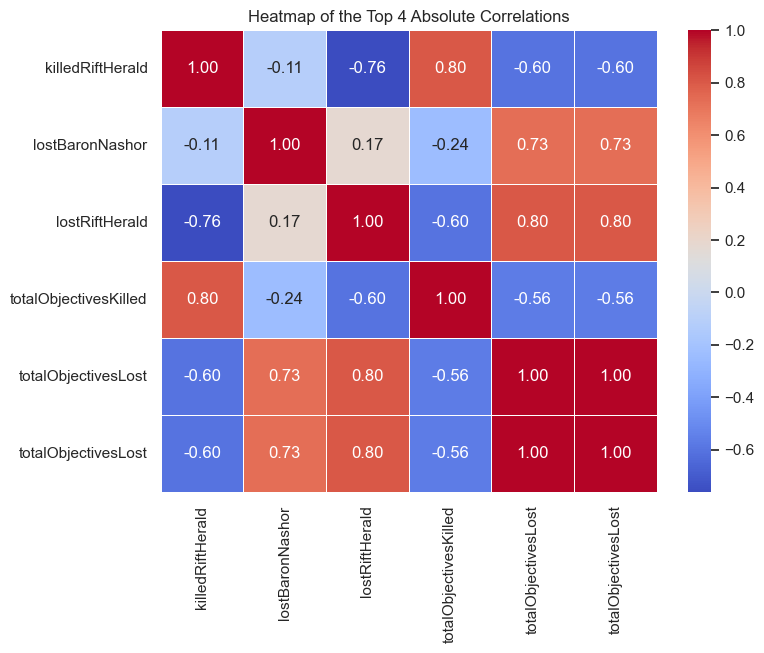

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def top_correlation_matrix(df: pd.DataFrame, n: int = 5) -> None:
    """
    Generates a heatmap of the top n absolute correlations in the given DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame for which to compute and visualize the correlation matrix.
    n : int, optional
        The number of top absolute correlations to display (default is 5).
    """
    
    # Generate the correlation matrix
    correlations = df.corr()
    
    # Get the absolute correlations in a Series format
    absolute_correlations = correlations.abs().unstack()
    
    # Remove self-correlations (diagonal elements)
    absolute_correlations = absolute_correlations[absolute_correlations < 1]
    
    # Sort the correlations in descending order
    top_correlations = absolute_correlations.sort_values(ascending=False).drop_duplicates()
    
    # Ensure we take the top n correlations, even with ties
    top_n_correlations = top_correlations.head(n)

    # Get the variables involved in the highest correlations
    involved_variables = top_n_correlations.index.get_level_values(0).union(
        top_n_correlations.index.get_level_values(1)
    )
    
    # Filter the correlation matrix to only include the involved variables
    filtered_correlations = df[involved_variables].corr()
    
    # Display the heatmap for the top n correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(filtered_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f'Heatmap of the Top {n} Absolute Correlations')
    plt.show()

# Example usage
top_correlation_matrix(df_with_replaced_outliers, 4)  # Showing the top 5 correlations


### **Resumen:**

Después de este análisis de los objetivos neutrales, se puede apreciar que los dragones tienen una correlación más fuerte con el resultado de la partida en comparación con otros objetivos. Esta relación destacada sugiere que el asesinato de dragones tiene un impacto significativo en las posibilidades de victoria. Por lo tanto, hemos decidido enfocar nuestro análisis en la victoria en función de estos objetivos, dada su relevancia y su influencia en el resultado final de las partidas.

### **¿Cómo afectan los dragones a la victoria del equipo?**

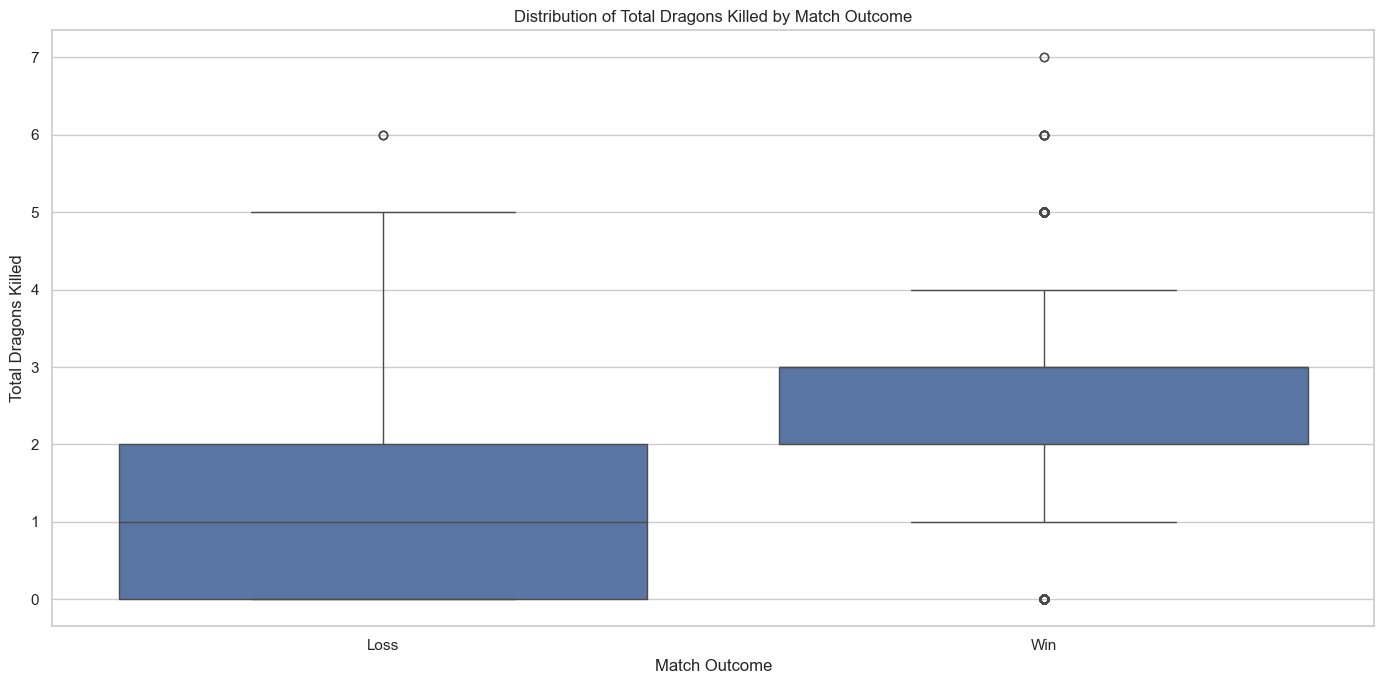

In [33]:
def grafico_wins_dragon(df: pd.DataFrame) -> None:
    """
    Generates a boxplot to visualize the distribution of total dragons killed 
    based on the match outcome.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a boxplot showing the 
        distribution of dragons killed for both outcomes (win and loss).
    
    Example:
    --------
    >>> grafico_wins_dragon(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    # Only one plot
    sns.boxplot(x='hasWon', y='totalDragonsKilled', data=df)
    
    # Customize axes and title
    plt.title('Distribution of Total Dragons Killed by Match Outcome')
    plt.xlabel('Match Outcome')
    plt.ylabel('Total Dragons Killed')
    
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
grafico_wins_dragon(df_with_replaced_outliers)

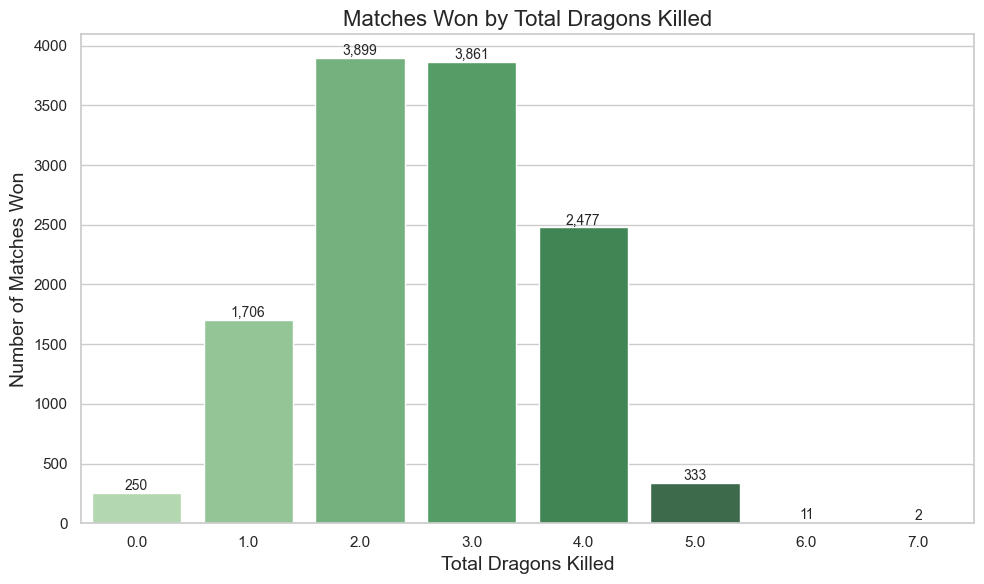

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def grafico_partidas_ganadas_dragones(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches won based on the total dragons killed.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches won for different numbers of dragons killed.
    
    Example:
    --------
    >>> grafico_partidas_ganadas_dragones(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    # Group by the number of dragons killed and count wins
    df_wins_by_dragons = df[df['hasWon'] == 1].groupby('totalDragonsKilled').size().reset_index(name='partidas_ganadas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_ganadas', data=df_wins_by_dragons, 
                     hue='totalDragonsKilled', palette='Greens_d', legend=False)
    
    for index, row in df_wins_by_dragons.iterrows():
        ax.text(row['totalDragonsKilled'], row['partidas_ganadas'], f'{row["partidas_ganadas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title('Matches Won by Total Dragons Killed', fontsize=16)
    plt.xlabel('Total Dragons Killed', fontsize=14)
    plt.ylabel('Number of Matches Won', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
grafico_partidas_ganadas_dragones(df_with_replaced_outliers)


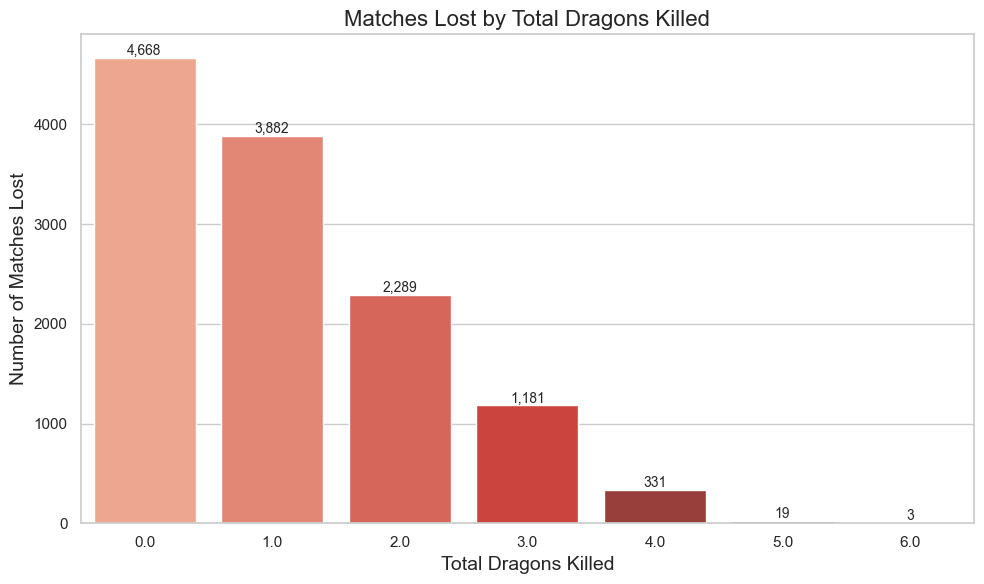

In [35]:
def grafico_partidas_perdidas_dragones(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches lost based on the total dragons killed.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'totalDragonsKilled': Total number of dragons killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches lost for different numbers of dragons killed.
    
    Example:
    --------
    >>> grafico_partidas_perdidas_dragones(df_con_outliers_reemplazados)
    """
    sns.set_theme(style="whitegrid")
    
    # Group by the number of dragons killed and count losses
    df_losses_by_dragons = df[df['hasWon'] == 0].groupby('totalDragonsKilled').size().reset_index(name='partidas_perdidas')
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='totalDragonsKilled', y='partidas_perdidas', data=df_losses_by_dragons, 
                     hue='totalDragonsKilled', palette='Reds_d', legend=False)
    
    for index, row in df_losses_by_dragons.iterrows():
        ax.text(row['totalDragonsKilled'], row['partidas_perdidas'], f'{row["partidas_perdidas"]:,.0f}', 
                ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title('Matches Lost by Total Dragons Killed', fontsize=16)
    plt.xlabel('Total Dragons Killed', fontsize=14)
    plt.ylabel('Number of Matches Lost', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
grafico_partidas_perdidas_dragones(df_with_replaced_outliers)

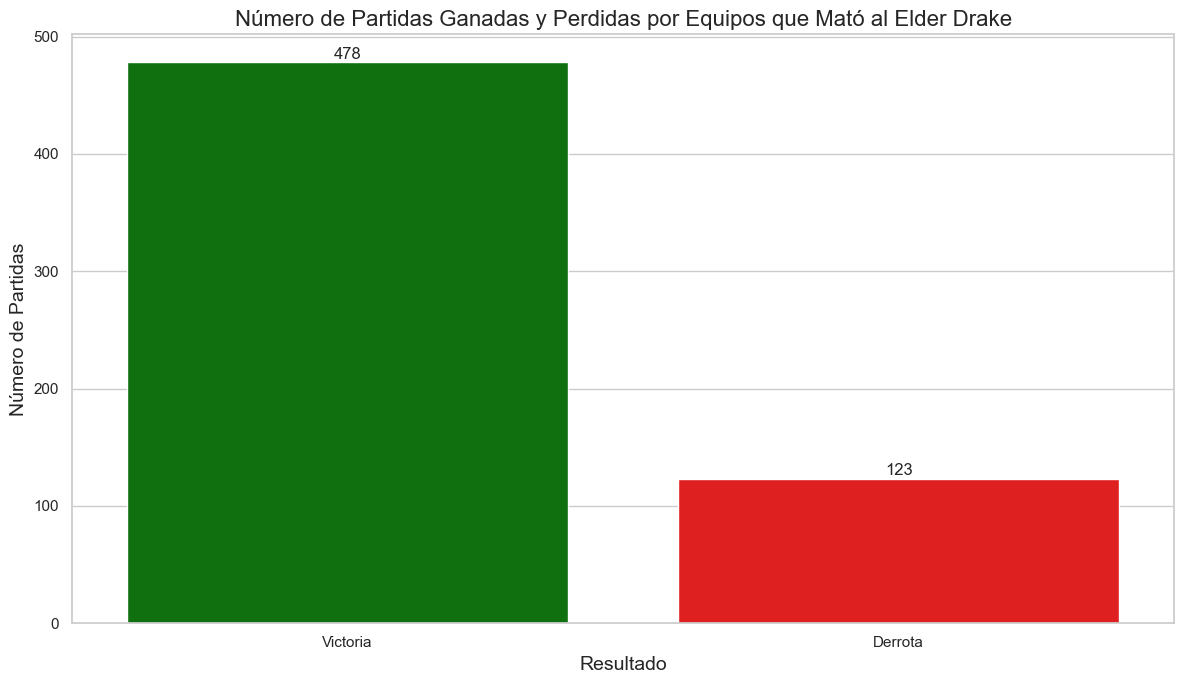

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def grafico_barras_victorias_derrotas_elder_drake(df: pd.DataFrame) -> None:
    """
    Generates a bar plot to visualize the number of matches won and lost by teams 
    that killed the Elder Drake.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing game data. It must include the following columns:
        - 'hasWon': Binary indicator of match outcome (0 for loss, 1 for win).
        - 'killedElderDrake': Number of Elder Drakes killed in the match.

    Returns:
    -------
    None
        This function does not return any value. It displays a bar plot showing the 
        number of matches won and lost by teams that killed the Elder Drake.

    Example:
    --------
    >>> grafico_barras_victorias_derrotas_elder_drake(df_con_outliers_reemplazados)
    """
    df_elder = df[df['killedElderDrake'] > 0]
    
    # Count the number of matches won and lost
    conteo_resultados = df_elder['hasWon'].value_counts().reset_index()
    conteo_resultados.columns = ['hasWon', 'Número de Partidas']
    
    # Map 'hasWon' to labels
    conteo_resultados['Resultado'] = conteo_resultados['hasWon'].map({1: 'Victoria', 0: 'Derrota'})
    
    # Set seaborn style
    sns.set_theme(style="whitegrid")
    
    # Create the figure and axes
    plt.figure(figsize=(12, 7))
    
    # Create the bar plot with hue
    ax = sns.barplot(x='Resultado', y='Número de Partidas', data=conteo_resultados,
                     hue='Resultado', palette={'Victoria': 'green', 'Derrota': 'red'}, legend=False)
    
    # Add text labels above the bars
    for i, row in conteo_resultados.iterrows():
        ax.text(i, row['Número de Partidas'] + 0.5,  
                f'{row["Número de Partidas"]}', 
                ha='center', va='bottom', fontsize=12)
    
    # Configure titles and labels
    plt.title('Número de Partidas Ganadas y Perdidas por Equipos que Mató al Elder Drake', fontsize=16)
    plt.xlabel('Resultado', fontsize=14)
    plt.ylabel('Número de Partidas', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Call the function with the DataFrame
grafico_barras_victorias_derrotas_elder_drake(df_with_replaced_outliers)


### **Resumen:**
Los datos muestran que existe una relación directa entre la obtención de objetivos neutrales y la victoria en una partida. Matar objetivos clave como el Heraldo de la Grieta y los dragones (fuego, agua, aire y tierra) está fuertemente asociado con una mayor probabilidad de ganar. Dentro de estos objetivos, los dragones asesinados tienen la mayor correlación con la victoria. Sin embargo, en partidas que se extienden por mucho tiempo, el Elder Drake se convierte en un objetivo crucial que puede definir el resultado final de la partida. La pérdida de estos objetivos tiene un impacto negativo significativo en las posibilidades de victoria.

### **¿El número de asesinatos (Kills) y asistencias (Assists) durante los primeros 10 minutos de juego tiene un impacto significativo en la probabilidad de victoria de un equipo?**

In [37]:
def filter_early_game(df: pd.DataFrame, time_limit: int = 10) -> pd.DataFrame:
    """
    Filters the data to consider only the first 10 minutes of each match.
    
    :param df: DataFrame with game data
    :param time_limit: Time limit in minutes 
    :return: Filtered DataFrame
    """
    return df[df['frame'] <= time_limit]


In [38]:
early_game_df = filter_early_game(df)
early_game_df.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


In [39]:
# Función para agrupar asesinatos y asistencias
def group_kills_assists(df: pd.DataFrame) -> pd.DataFrame:
    """
    Groups the data by team to calculate the total kills and assists
    in the first 10 minutes of the game.
    
    Parameters:
        df (pd.DataFrame): Filtered DataFrame containing 'kills' and 'assists' columns.
        
    Returns:
        pd.DataFrame: DataFrame with total 'kills' and 'assists' per team.
    """
    return df.groupby('gameId').agg({'kills': 'sum', 'assists': 'sum'}).reset_index()

In [40]:
grouped_df = group_kills_assists(early_game_df)
grouped_df.head()

,gameId,kills,assists
0,4357970300,4,5
1,4357978575,7,7
2,4358313595,3,4
3,4358316661,8,7
4,4358361767,8,8


Estandarización de características:
Estandarizamos las características `kills` y `assists` para que todas estén en la misma escala. Esto es importante cuando utilizamos técnicas de análisis que son sensibles a la magnitud de los datos, para evitar que una variable con un rango más amplio domine la relación.


In [41]:
# Función para estandarizar los datos
def standardize_data(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Standardizes the selected columns using the StandardScaler technique.
    
    Parameters:
        df (pd.DataFrame): DataFrame with features to be standardized.
        columns (list): List of columns to be standardized.
        
    Returns:
        pd.DataFrame: DataFrame with standardized columns.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df


In [42]:
standardized_df = standardize_data(grouped_df, ['kills', 'assists'])
standardized_df.head()

,gameId,kills,assists
0,4357970300,-0.640008,-0.208304
1,4357978575,0.393341,0.320997
2,4358313595,-0.984457,-0.472955
3,4358316661,0.737790,0.320997
4,4358361767,0.737790,0.585648


Tratamiento de outliers
Eliminamos o ajustamos los outliers para asegurar que nuestro análisis no esté sesgado por valores extremos que no representen el comportamiento típico del juego. Para este caso, utilizamos el método del rango intercuartílico (IQR) y/o z-score, que son herramientas comunes para detectar valores atípicos.

In [43]:
def handle_outliers(df: pd.DataFrame, columns: list, method: str = 'zscore', threshold: float = 3) -> pd.DataFrame:
    """
    Handles outliers in the selected columns using the Z-score or IQR method.
    
    Parameters:
        df (pd.DataFrame): DataFrame with columns to analyze.
        columns (list): List of columns to check for outliers.
        method (str): Method to use ('zscore' or 'iqr').
        threshold (float): Threshold to identify outliers (only for zscore).
        
    Returns:
        pd.DataFrame: DataFrame without outliers in the selected columns.
    """
    if method == 'zscore':
        from scipy.stats import zscore
        df = df[(zscore(df[columns]) < threshold).all(axis=1)]
    elif method == 'iqr':
        Q1 = df[columns].quantile(0.25)
        Q3 = df[columns].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

In [44]:
no_outliers_df = handle_outliers(standardized_df, ['kills', 'assists'], method='iqr')
no_outliers_df.head()

,gameId,kills,assists
0,4357970300,-0.640008,-0.208304
1,4357978575,0.393341,0.320997
2,4358313595,-0.984457,-0.472955
3,4358316661,0.737790,0.320997
4,4358361767,0.737790,0.585648


In [45]:
# Definimos la función
def add_game_statistics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds statistics per game, summing kills, assists, and determining the result.
    
    :param df: DataFrame with filtered game data
    :return: DataFrame with aggregated statistics per game
    """
    grouped_stats = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum',
        'hasWon': 'max'  # Assuming 'hasWon' is constant for each gameId
    }).reset_index()
    
    grouped_stats['Result'] = grouped_stats['hasWon'].map({1: 'Victory', 0: 'Defeat'})
    return grouped_stats

In [46]:
aggregated_df = add_game_statistics(early_game_df)
aggregated_df.head()

,gameId,kills,assists,hasWon,Result
0,4357970300,4,5,1,Victory
1,4357978575,7,7,0,Defeat
2,4358313595,3,4,0,Defeat
3,4358316661,8,7,0,Defeat
4,4358361767,8,8,1,Victory


In [47]:
def create_feature_ratios(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates additional features based on kill and assist ratios.
    
    :param df: DataFrame with aggregated game statistics
    :return: DataFrame with additional features
    """
    df['kill_assist_ratio'] = df['kills'] / (df['assists'] + 1)  # Avoid division by zero
    df['total_actions'] = df['kills'] + df['assists']
    return df

In [48]:
features_df = create_feature_ratios(aggregated_df)
features_df.head()

,gameId,kills,assists,hasWon,Result,kill_assist_ratio,total_actions
0,4357970300,4,5,1,Victory,0.666667,9
1,4357978575,7,7,0,Defeat,0.875000,14
2,4358313595,3,4,0,Defeat,0.600000,7
3,4358316661,8,7,0,Defeat,1.000000,15
4,4358361767,8,8,1,Victory,0.888889,16


In [49]:
def handle_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handles missing values in the DataFrame.
    
    :param df: DataFrame with potential missing values
    :return: DataFrame with imputed missing values
    """
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values in numeric columns
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df


In [50]:
imputed_df = handle_missing_values(features_df)
imputed_df.head()

,gameId,kills,assists,hasWon,Result,kill_assist_ratio,total_actions
0,4.357970e+09,4.0,5.0,1.0,Victory,0.666667,9.0
1,4.357979e+09,7.0,7.0,0.0,Defeat,0.875000,14.0
2,4.358314e+09,3.0,4.0,0.0,Defeat,0.600000,7.0
3,4.358317e+09,8.0,7.0,0.0,Defeat,1.000000,15.0
4,4.358362e+09,8.0,8.0,1.0,Victory,0.888889,16.0


In [51]:
def scale_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Scales the numeric features of the DataFrame.
    
    :param df: DataFrame with unscaled features
    :return: DataFrame with scaled features
    """
    scaler = StandardScaler()
    numeric_features = ['kills', 'assists', 'kill_assist_ratio', 'total_actions']
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    return df

In [52]:
scaled_df = scale_features(imputed_df)
scaled_df.head()

,gameId,kills,assists,hasWon,Result,kill_assist_ratio,total_actions
0,4.357970e+09,-0.640008,-0.208304,1.0,Victory,-0.626495,-0.417883
1,4.357979e+09,0.393341,0.320997,0.0,Defeat,-0.164453,0.372021
2,4.358314e+09,-0.984457,-0.472955,0.0,Defeat,-0.774349,-0.733845
3,4.358317e+09,0.737790,0.320997,0.0,Defeat,0.112773,0.530002
4,4.358362e+09,0.737790,0.585648,1.0,Victory,-0.133650,0.687983


In [53]:
def encode_categorical_variables(df: pd.DataFrame) -> pd.DataFrame:
    """
    Encodes categorical variables.
    
    :param df: DataFrame with categorical variables
    :return: DataFrame with encoded categorical variables
    """
    df = pd.get_dummies(df, columns=['Result'], drop_first=True)
    return df

In [54]:
encoded_df = encode_categorical_variables(scaled_df)
encoded_df.head()

,gameId,kills,assists,hasWon,kill_assist_ratio,total_actions,Result_Victory
0,4.357970e+09,-0.640008,-0.208304,1.0,-0.626495,-0.417883,True
1,4.357979e+09,0.393341,0.320997,0.0,-0.164453,0.372021,False
2,4.358314e+09,-0.984457,-0.472955,0.0,-0.774349,-0.733845,False
3,4.358317e+09,0.737790,0.320997,0.0,0.112773,0.530002,False
4,4.358362e+09,0.737790,0.585648,1.0,-0.133650,0.687983,True


In [55]:
def prepare_data(df: pd.DataFrame, time_limit: int = 10) -> pd.DataFrame:
    """
    Main function that executes the entire data preparation process.
    
    :param df: Original DataFrame with all game data
    :param time_limit: Time limit to filter early game
    :return: DataFrame prepared for analysis or modeling
    """
    early_game_df = filter_early_game(df, time_limit)
    grouped_df = add_game_statistics(early_game_df)
    feature_df = create_feature_ratios(grouped_df)
    imputed_df = handle_missing_values(feature_df)
    scaled_df = scale_features(imputed_df)
    encoded_df = encode_categorical_variables(scaled_df)
    
    return encoded_df

Visualización de la correlación
Para evaluar las relaciones entre las características clave (como asesinatos, asistencias y otras estadísticas del juego) y
la probabilidad de victoria, graficamos una matriz de correlación. Esta visualización nos permite identificar 
rápidamente cuáles son las variables más importantes que podrían influir en el resultado final.

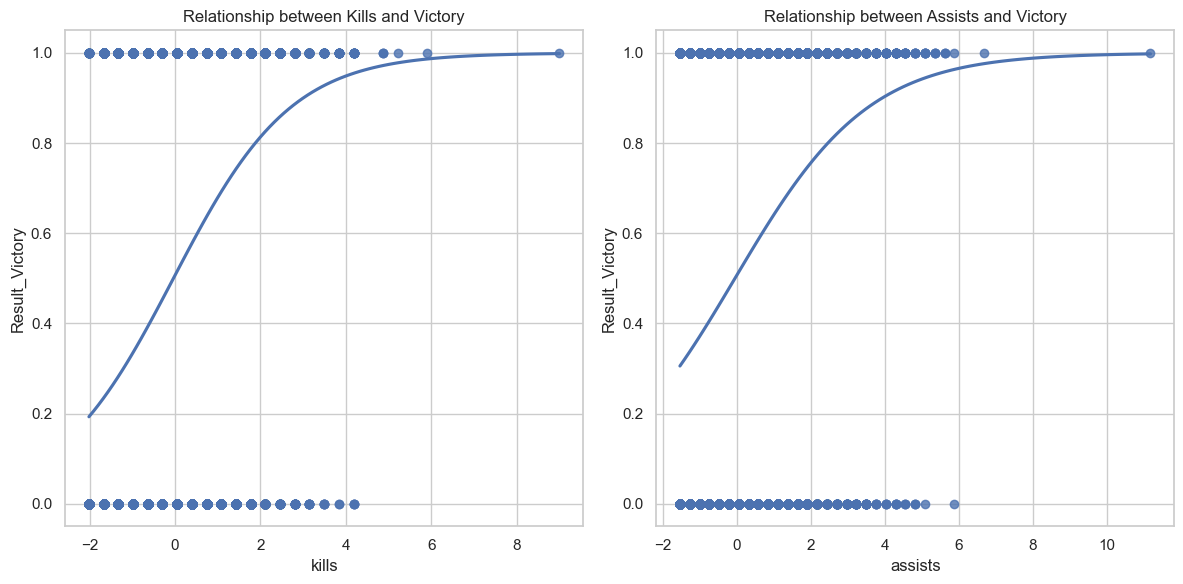

In [56]:
def plot_correlation(df: pd.DataFrame) -> None:
    """
    Creates a scatter plot with regression to visualize the relationship between kills,
    assists, and the result (Victory or Defeat) in the first 10 minutes of the game.
    
    :param df: DataFrame with prepared data
    """
    # Ensure 'Result_Victory' is in numeric format
    if 'Result_Victory' not in df.columns:
        df['Result_Victory'] = df['hasWon']
    
    # Create a scatter plot for 'kills' and 'assists' separated by 'Result'
    plt.figure(figsize=(12, 6))
    
    # Plot the relationship between kills and the result
    plt.subplot(1, 2, 1)
    sns.regplot(x='kills', y='Result_Victory', data=df, logistic=True, ci=None)
    plt.title('Relationship between Kills and Victory')
    
    # Plot the relationship between assists and the result
    plt.subplot(1, 2, 2)
    sns.regplot(x='assists', y='Result_Victory', data=df, logistic=True, ci=None)
    plt.title('Relationship between Assists and Victory')
    
    plt.tight_layout()
    plt.show()

# Execute the data preparation flow and plot the correlation
prepared_df = prepare_data(df, time_limit=10)
plot_correlation(prepared_df)

### **Resumen:**



el número de asesinatos (kills) y asistencias (assists) durante los primeros 10 minutos del juego parece tener un impacto significativo en la probabilidad de victoria del equipo. A medida que los valores de "kills" y "assists" aumentan, la probabilidad de victoria se incrementa de manera notable.

### **¿Los equipos que obtienen una ventaja en asesinatos y asistencias en los primeros 10 minutos tienen una mayor probabilidad de ampliar esa ventaja a lo largo de la partida?**



In [57]:
def filter_early_game_snowball(df: pd.DataFrame, time_limit: int = 10) -> pd.DataFrame:
    """
    Filters the data to consider only the first 10 minutes of each match.
    
    :param df: DataFrame with game data
    :param time_limit: Time limit in minutes (default 10)
    :return: Filtered DataFrame
    """
    return df[df['frame'] <= time_limit]

# Cell 2
early_game_df = filter_early_game_snowball(df)
early_game_df.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
14,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,0,0,7,5,5,14,3,2
25,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,0,0,6,3,8,11,1,1
38,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,0,0,3,6,2,11,1,1


Esta función calcula y agrega estadísticas de kills y assists en los primeros 10 minutos del juego. Permite evaluar la ventaja inicial de los equipos, crucial para el análisis del snowball.(efecto bola de nieve)

In [58]:
def calculate_advantage(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the initial advantage in kills and assists.
    
    :param df: DataFrame with early game data
    :return: DataFrame with calculated advantages
    """
    advantage = df.groupby('gameId').agg({
        'kills': 'sum',
        'assists': 'sum'
    }).reset_index()
    
    advantage['kill_advantage'] = advantage['kills'].diff().fillna(0)
    advantage['assist_advantage'] = advantage['assists'].diff().fillna(0)
    
    df = df.merge(advantage[['gameId', 'kill_advantage', 'assist_advantage']], on='gameId', how='left')
    return df

advantage_df = calculate_advantage(early_game_df)
advantage_df.head()


,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost,kill_advantage,assist_advantage
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,4,7,5,21,3,5,0.0,2.0
1,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,6,6,7,15,4,1,1.0,5.0
2,4402345420,1790000,1,10,-155,-113,-0.2,0,1,0,...,0,0,7,5,5,14,3,2,-2.0,-1.0
3,4546761795,2065000,0,10,2307,96,0.2,0,1,0,...,0,0,6,3,8,11,1,1,-1.0,1.0
4,4528965743,1307000,0,10,-3297,-2882,-0.6,0,1,0,...,0,0,3,6,2,11,1,1,-9.0,-6.0


In [59]:
def create_cumulative_snowball_ratios(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the cumulative advantage in kills and assists throughout the match.
    
    :param df: DataFrame with game statistics
    :return: DataFrame with cumulative advantages
    """
    df['cumulative_kill_advantage'] = df.groupby('gameId')['kills'].cumsum()
    df['cumulative_assist_advantage'] = df.groupby('gameId')['assists'].cumsum()
    
    return df

statistics_df = advantage_df  

# Call the function and display the result
cumulative_ratios_df = create_cumulative_snowball_ratios(statistics_df)
print("Cumulative Kill Advantage:\n", cumulative_ratios_df[['gameId', 'kills', 'cumulative_kill_advantage']].head())
print("Cumulative Assist Advantage:\n", cumulative_ratios_df[['gameId', 'assists', 'cumulative_assist_advantage']].head())

Cumulative Kill Advantage:
        gameId  kills  cumulative_kill_advantage
0  4546233126      4                          4
1  4438212663      6                          6
2  4402345420      7                          7
3  4546761795      6                          6
4  4528965743      3                          3
Cumulative Assist Advantage:
        gameId  assists  cumulative_assist_advantage
0  4546233126        5                            5
1  4438212663        7                            7
2  4402345420        5                            5
3  4546761795        8                            8
4  4528965743        2                            2


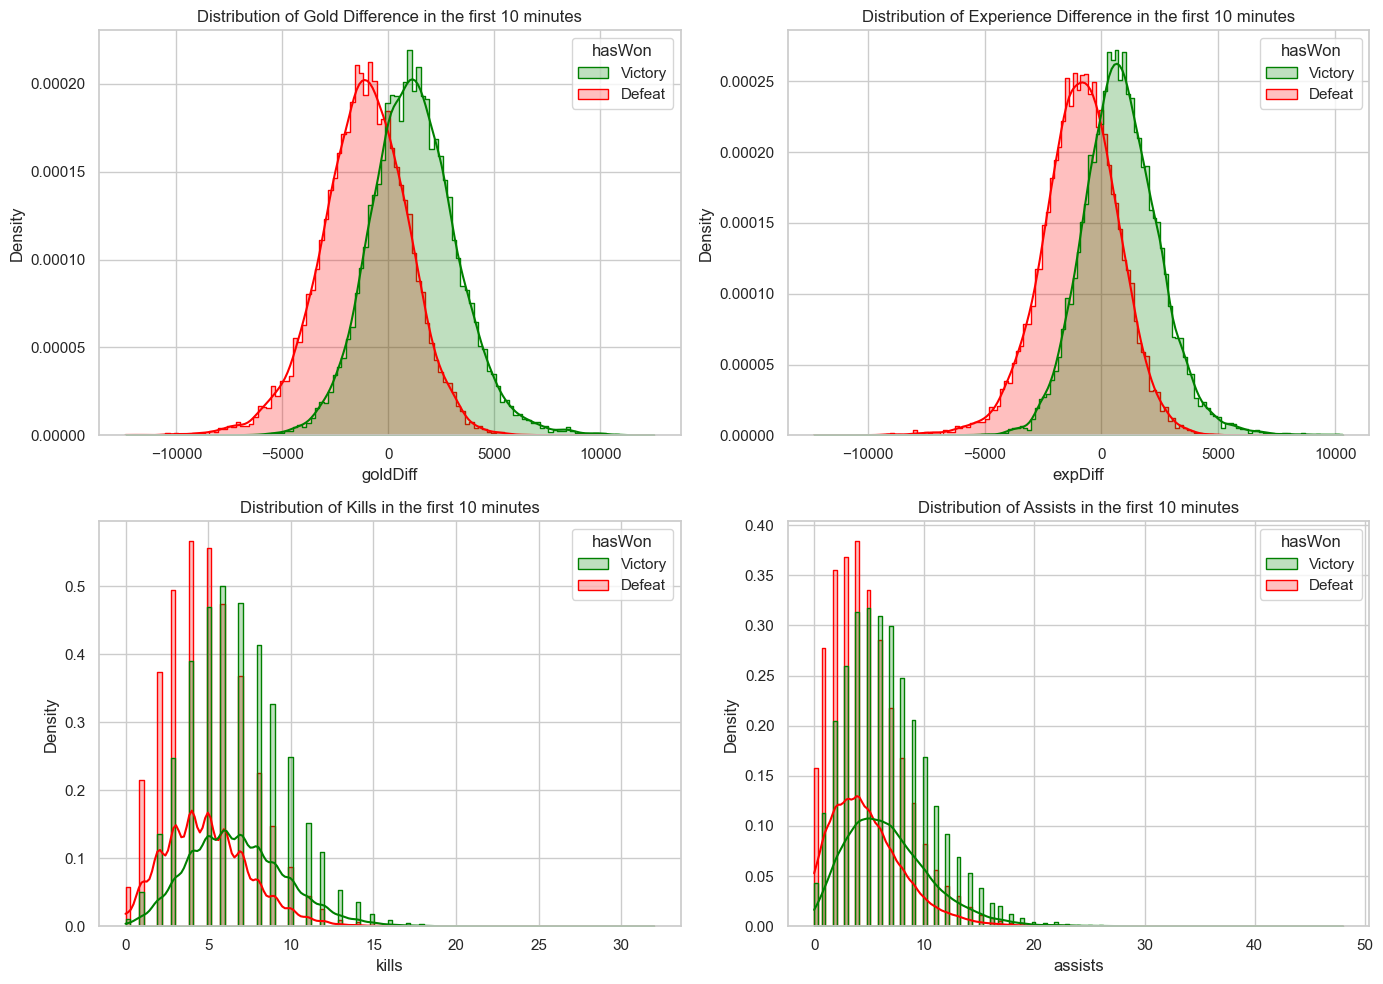

In [60]:
def plot_snowball_histograms(df: pd.DataFrame, time_limit: int = 10) -> None:
    """
    Filters the data for the first few minutes of the match and generates histograms
    to visualize how early advantages are distributed based on whether the team won or lost the match.
    The metrics considered are:
    - Gold difference (goldDiff)
    - Experience difference (expDiff)
    - Kills
    - Assists
    
    Parameters:
    - df (DataFrame): DataFrame with match data.
    - time_limit (int): Time limit in minutes to consider as early game (default: 10 minutes).
    """
    
    # Filter the data for the first few minutes
    early_game_df = filter_early_game_snowball(df, time_limit).copy()

    # Map 'hasWon' values to text labels
    early_game_df['hasWon'] = early_game_df['hasWon'].map({0: 'Defeat', 1: 'Victory'})

    # Colors for the plot sections
    colors = {'Defeat': 'red', 'Victory': 'green'}

    plt.figure(figsize=(14, 10))

    # Histogram of gold difference
    plt.subplot(2, 2, 1)
    sns.histplot(data=early_game_df, x='goldDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Gold Difference in the first {time_limit} minutes')

    # Histogram of experience difference
    plt.subplot(2, 2, 2)
    sns.histplot(data=early_game_df, x='expDiff', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Experience Difference in the first {time_limit} minutes')

    # Histogram of kills
    plt.subplot(2, 2, 3)
    sns.histplot(data=early_game_df, x='kills', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Kills in the first {time_limit} minutes')

    # Histogram of assists
    plt.subplot(2, 2, 4)
    sns.histplot(data=early_game_df, x='assists', hue='hasWon', kde=True, element="step", stat="density", common_norm=False, palette=colors)
    plt.title(f'Distribution of Assists in the first {time_limit} minutes')

    plt.tight_layout()
    plt.show()

# Call the function with the data and a time limit of 10 minutes
plot_snowball_histograms(df, time_limit=10)


Se analizó la correlación entre las ventajas en kills y assists en los primeros 10 minutos y el resultado final.
Los resultados mostraron una fuerte correlación positiva entre ventaja_kills y hasWon, mientras que ventaja_assists presentó una correlación más baja.

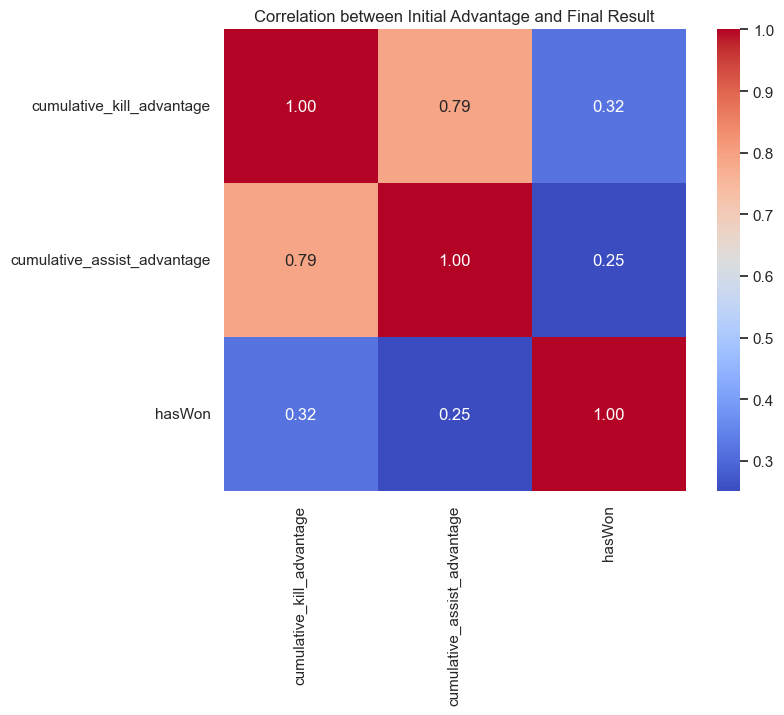

In [61]:
def analyze_correlation(df: pd.DataFrame) -> None:
    """
    Analyzes the correlation between the initial advantage and the final result.
    """
    # Ensure the DataFrame has the correct columns
    if 'cumulative_kill_advantage' in df.columns and 'cumulative_assist_advantage' in df.columns and 'hasWon' in df.columns:
        # Calculate the correlation
        correlation = df[['cumulative_kill_advantage', 'cumulative_assist_advantage', 'hasWon']].corr()

        # Set up the plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        plt.title('Correlation between Initial Advantage and Final Result')
        plt.show()
    else:
        print("Error: The DataFrame does not contain the required columns.")

# Call the function and display the result
analyze_correlation(cumulative_ratios_df)  # Ensure you use the correct DataFrame here


### **Resumen:**


La diferencia de oro (goldDiff) y la diferencia de experiencia (expDiff) en los primeros 10 minutos del juego parecen ser factores clave que afectan el resultado de una partida. Los equipos que logran obtener una mayor ventaja en oro y experiencia durante este tiempo tienden a tener una probabilidad más alta de ganar. Además, los asesinatos (kills) y asistencias (assists) en esta etapa temprana del juego también están correlacionados con el éxito posterior, ya que los equipos que logran asegurar más eliminaciones y colaboraciones tempranas tienen una tendencia mayor a consolidar la ventaja y llevarse la victoria.

### **Predicción de serie temporal**

### **Tratamiento valores atípicos:**

In [62]:
def tratar_valores_atipicos(df, column):
  'Imputa valores atípicos de una columna específica.'
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  # Reemplazar valores atípicos con los límites
  df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
  return df

# Aplicar la función
df_tratado = tratar_valores_atipicos(df, 'gameDuration')

### **Seleccion de variables:**

In [63]:
from sklearn.feature_selection import SelectKBest, f_regression

def seleccionar_mejores_caracteristicas(df, target_column, k=10):
  """Selecciona las k mejores características relacionadas con la columna objetivo."""
  X = df.drop(columns=[target_column])
  y = df[target_column]
  
  # Aplicar SelectKBest con f_regression
  bestfeatures = SelectKBest(score_func=f_regression, k=k)
  fit = bestfeatures.fit(X, y)
  
  # Obtener las características seleccionadas
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  featureScores = pd.concat([dfcolumns, dfscores], axis=1)
  featureScores.columns = ['Feature', 'Score']
  
  return featureScores.nlargest(k, 'Score')

# Supongamos que 'df' es tu DataFrame original
mejores_caracteristicas = seleccionar_mejores_caracteristicas(df, 'gameDuration', k=10)
print(mejores_caracteristicas)

              Feature         Score
2               frame  56405.593794
56     wardsDestroyed  44061.491200
57          wardsLost  43786.053838
54            assists  31070.895498
53             deaths  27769.625924
52              kills  26424.218003
19    lostBaronNashor  17075.916063
18  killedBaronNashor  15304.587510
55        wardsPlaced  10828.861265
6        isFirstTower  10636.258823


### **Escalado de datos:**

In [64]:
from sklearn.preprocessing import MinMaxScaler


# Lista de las mejores características seleccionadas junto a 'gameDuration'
mejores_caracteristicas = [
  'wardsDestroyed', 'wardsLost', 'assists', 'deaths', 'kills',
  'lostBaronNashor', 'killedBaronNashor', 'wardsPlaced', 'isFirstTower', 'gameDuration'
]

def escalar_caracteristicas(df, columnas):
  """Escala las características especificadas de un DataFrame."""
  scaler = MinMaxScaler()
  df[columnas] = scaler.fit_transform(df[columnas])
  return df[columnas]

# Escalar las características seleccionadas
df_escalado = escalar_caracteristicas(df, mejores_caracteristicas)


df_escalado.head()

,wardsDestroyed,wardsLost,assists,deaths,kills,lostBaronNashor,killedBaronNashor,wardsPlaced,isFirstTower,gameDuration
0,0.026087,0.046729,0.036496,0.097222,0.057971,0.0,0.0,0.017804,0.0,0.329868
1,0.034783,0.056075,0.043796,0.152778,0.086957,0.0,0.0,0.024728,0.0,0.329868
2,0.034783,0.056075,0.087591,0.152778,0.144928,0.0,0.0,0.031652,1.0,0.329868
3,0.052174,0.093458,0.087591,0.166667,0.144928,0.0,0.0,0.041543,1.0,0.329868
4,0.060870,0.112150,0.116788,0.180556,0.188406,0.0,0.0,0.045500,1.0,0.329868


Se escalaron los datos para asegurar que todas las características contribuyan de manera equitativa al análisis y modelado, evitando que las variables con rangos más amplios, como `gameDuration`, dominen el proceso. 

### **¿Conseguir la Primera Sangre incrementa las posibilidades de ganar la partida?**

In [65]:
def victorias_isFirsBlood(df):
    """
    Calcula la proporción de victorias con y sin Primera Sangre.

    """
    proportions = df.groupby('isFirstBlood')['hasWon'].value_counts(normalize=True).unstack()
    proportions.columns = ['Perdió', 'Ganó']
    return proportions

# Uso de la función
victorias_isFirsBlood(df)

,Perdió,Ganó
isFirstBlood,,
0,0.849850,0.150150
1,0.501393,0.498607


In [66]:
def comparar_winrate(df):
    #usamos la libreria scipy para poder ocupar la funcion chi2_contingency y ver la relacion entre variables categoricas
    contingency_table = pd.crosstab(df['isFirstBlood'], df['hasWon'])
    """
        medimos la diferencia entre las frecuencias observadas y esperadas 
        en las categorías "isFirstBlood" y "hasWon"
    
    """
    chi2, p, _, _ = stats.chi2_contingency(contingency_table) 
    win_rates = victorias_isFirsBlood(df) 
    
    return {
        'win_rates': win_rates,
        'chi2_statistic': chi2,
        'p_value': p
    }

comparar_winrate(df)

{'win_rates':                 Perdió      Ganó
 isFirstBlood                    
 0             0.849850  0.150150
 1             0.501393  0.498607,
 'chi2_statistic': np.float64(160.12350232509974),
 'p_value': np.float64(1.06332158366944e-36)}

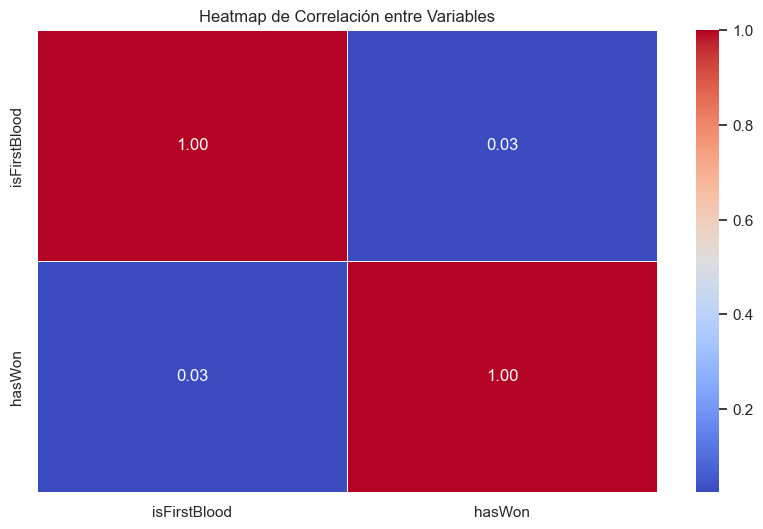

              isFirstBlood    hasWon
isFirstBlood      1.000000  0.025804
hasWon            0.025804  1.000000


In [67]:
def heatmap(df):

    # Seleccionamos las variables relevantes para el heatmap
    relevant_columns = ['isFirstBlood', 'hasWon']
    correlation_matrix = df[relevant_columns].corr()
    plt.figure(figsize=(10, 6))
    
    # Generamos el heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap de Correlación entre Variables')
    plt.show()

    print(correlation_matrix)


heatmap(df)

### **Resumen:**


Segun el analisis, los equipos que obtienen la Primera Sangre tienen una tasa de victorias significativamente mayor (49.86%) en comparacion con los equipos que no la obtienen (15.02%). El valor p (1.06e-36) y el estadistico Chi-Square (160.12) confirman que la correlacion entre isFirstBlood y hasWOn es estadísticamente significativa, a pesar de que la correlación es baja (0.026). Como resultado, obtener la Primera Sangre aumenta significativamente las posibilidades de ganar, a pesar de que el heatmap muestra una correlación baja.

## **Fase 4: Modeling**

### **¿La diferencia de oro (Gold Difference) obtenia por los asesinatos(kills) y asistencias en los primeros 10 minutos de juego tiene un impacto significativo en la probabilidad de victoria de un equipo?**

Conjunto de datos

In [116]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


def split_data_for_gold_difference(df: pd.DataFrame, target_column: str, time_limit: int = 10, test_size: float = 0.2, random_state: int = 42) -> tuple:
    """
    Split a DataFrame into training and testing sets based on gold difference from kills and assists in the first 10 minutes.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing game data.
    target_column (str): The name of the target variable column.
    time_limit (int): The time limit in minutes to filter the early game data (default is 10).
    test_size (float): The proportion of the dataset to include in the test split (default is 0.2).
    random_state (int): Controls the shuffling applied to the data before applying the split (default is 42).

    Returns:
    tuple: A tuple containing the training features (X_train), test features (X_test),
           training labels (y_train), and test labels (y_test).
    """
    # Filter the data for the first 10 minutes
    early_game_df = df[df['frame'] <= 10].copy()

    # Calculate gold difference from kills and assists
    early_game_df['goldDiff_kills_assists'] = early_game_df['kills'] * 300 + early_game_df['assists'] * 150

    # Separate features (X) and target (y)
    X = early_game_df[['goldDiff_kills_assists']]
    y = early_game_df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Use the function to split your data
X_train, X_test, y_train, y_test = split_data_for_gold_difference(df, target_column='hasWon')

modelo

In [117]:
# Inicializar el clasificador RandomForestClassifier
model = RandomForestClassifier(random_state=42)

gridsearch

In [118]:
# Definir los parámetros a probar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1', verbose=1)

In [119]:
# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [120]:
# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [121]:
# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)


smote

In [123]:
from imblearn.over_sampling import SMOTE

def apply_smote(X, y, random_state=42):
    """
    Applies SMOTE to balance the classes in the dataset.
    
    Parameters:
    X (pd.DataFrame or np.ndarray): The input features.
    y (pd.Series or np.ndarray): The target labels.
    random_state (int): The seed used by the random number generator.

    Returns:
    tuple: The resampled features and labels.
    """
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

# Filtrar los datos para los primeros 10 minutos
early_game_df = df[df['frame'] <= 10].copy()

# Calcular la diferencia de oro de asesinatos y asistencias
early_game_df['goldDiff_kills_assists'] = early_game_df['kills'] * 300 + early_game_df['assists'] * 150

# Verificar si la columna existe
if 'goldDiff_kills_assists' in early_game_df.columns:
    X = early_game_df[['goldDiff_kills_assists']]
    y = early_game_df['hasWon']
    
    # Aplicar SMOTE a los datos
    X_resampled, y_resampled = apply_smote(X, y)
else:
    print("La columna 'goldDiff_kills_assists' no existe en el DataFrame.")

In [128]:
# Inicializar el clasificador RandomForestClassifier con los mejores parámetros
model_smote = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

# Entrenar el modelo con los datos balanceados
model_smote.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_smote = model_smote.predict(X_test)

In [129]:
# Evaluar el modelo
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2386
         1.0       0.90      0.89      0.90      2597

    accuracy                           0.89      4983
   macro avg       0.89      0.89      0.89      4983
weighted avg       0.89      0.89      0.89      4983



### **¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?**

### **XGBOOSTCLASIFIER:**

#### **Dividir el Conjunto de datos:**

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score,classification_report, confusion_matrix
from xgboost import XGBClassifier


def split_data(df: pd.DataFrame, target_column: str, test_size: float = 0.2, random_state: int = 42) -> tuple:
    """
    Split a DataFrame into training and testing sets.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing features and the target variable.
    target_column (str): The name of the target variable column.
    test_size (float): The proportion of the dataset to include in the test split (default is 0.2).
    random_state (int): Controls the shuffling applied to the data before applying the split (default is 42).

    Returns:
    tuple: A tuple containing the training features (X_train), test features (X_test),
           training labels (y_train), and test labels (y_test).
    """
    # Separar características (X) y etiquetas (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df_with_replaced_outliers, target_column='hasWon')

#### **Creación de modelo:**

In [131]:
# Inicializar el clasificador XGBClassifier
model = XGBClassifier(verbosity=0)

#### **Grid Search:**

Se definen diccionarios para ir probando diferentes parámetros para el modelo con grid search

In [132]:
# Definir los parámetros a probar
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 5, 10, 15, 19],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0]
}
# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


KeyboardInterrupt: 

In [72]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 19, 'n_estimators': 100, 'subsample': 1.0}


In [73]:
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

Después de obtener los mejores paramétros según grid search, se utilizaran diferentes metricas para validar el funcionamiento del modelo

#### **SMOTE:**

ahora aplicaremos SMOTE (Synthetic Minority Over-sampling Technique) para ver si se puede balacear mas los datos y mejorar más las predicciones 

In [74]:
def add_noise(data, noise_level=0.1):
    """
    Adds Gaussian noise to the input data.
    
    Parameters:
    data (np.ndarray): The input data to which noise will be added.
    noise_level (float): The standard deviation of the Gaussian noise.

    Returns:
    np.ndarray: The data with added noise.
    """
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Agregar ruido a los datos de entrenamiento
X_train_noisy = add_noise(X_train.values)

In [75]:
model_noisy = XGBClassifier(
    learning_rate=0.5,
    max_depth=2,
    min_child_weight=19,
    n_estimators=100,
    n_jobs=1,
    subsample=0.95,
    verbosity=0
)
model_noisy.fit(X_train_noisy, y_train)
y_pred_noisy = model_noisy.predict(X_test)

##### **Informe de clasificación**

In [76]:
report = classification_report(y_test, y_pred_noisy)
print("Informe de clasificación:\n", report)

Informe de clasificación:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2386
         1.0       0.90      0.90      0.90      2597

    accuracy                           0.90      4983
   macro avg       0.90      0.90      0.90      4983
weighted avg       0.90      0.90      0.90      4983



### **Resumen:**
El modelo ha obtenido resultados positivos al aplicar diversas métricas, gracias a la optimización realizada mediante Grid Search. Además, el uso de SMOTE para generar datos sintéticos y asi equilibrar de mejor manera los datos nos dio como resultado un f1-score general de 0.90, lo que indica una clasificación efectiva y balanceada.

## **Fase 5: Evaluation**

### **¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?**

### **XGBOOSTCLASIFIER:**

#####  **Matriz de Confusión:**

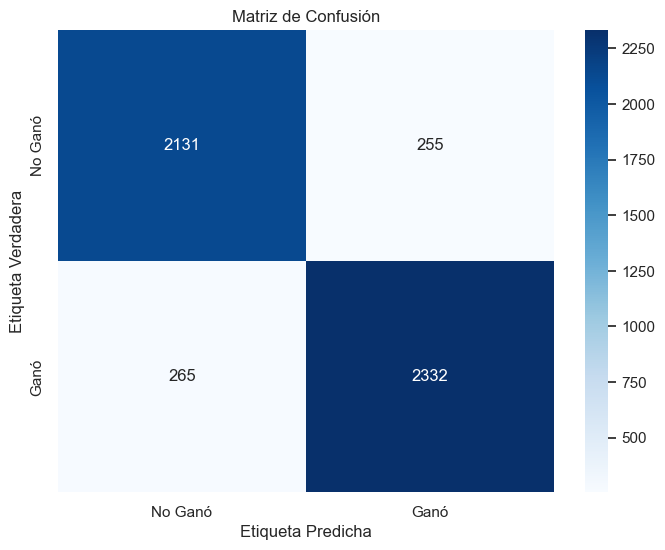

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred_noisy)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Ganó', 'Ganó'], yticklabels=['No Ganó', 'Ganó'])
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión')
plt.show()

##### **Informe de clasificación:**

In [78]:
report = classification_report(y_test, y_pred_noisy)
print("Informe de clasificación:\n", report)

Informe de clasificación:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2386
         1.0       0.90      0.90      0.90      2597

    accuracy                           0.90      4983
   macro avg       0.90      0.90      0.90      4983
weighted avg       0.90      0.90      0.90      4983



El f1-score obtenido fue bastante bueno los que nos da un buen resultado y los datos muestran estar bien balanceados

##### **Predicción**

In [79]:

# Definir el número de filas de datos sintéticos que quieres generar
num_filas = 5

# Generar datos sintéticos
datos_sinteticos = {
    'gameId': np.random.randint(1, 1000, size=num_filas), 
    'frame': np.random.randint(0, 1000, size=num_filas), 
    'killedFireDrake': np.random.randint(0, 2, size=num_filas),  
    'killedWaterDrake': np.random.randint(0, 2, size=num_filas), 
    'killedAirDrake': np.random.randint(0, 2, size=num_filas),   
    'killedEarthDrake': np.random.randint(0, 2, size=num_filas),
    'killedElderDrake': np.random.randint(0, 2, size=num_filas), 
    'lostFireDrake': np.random.randint(0, 2, size=num_filas),    
    'lostWaterDrake': np.random.randint(0, 2, size=num_filas),   
    'lostAirDrake': np.random.randint(0, 2, size=num_filas),    
    'lostEarthDrake': np.random.randint(0, 2, size=num_filas), 
    'lostElderDrake': np.random.randint(0, 2, size=num_filas),   
    'killedBaronNashor': np.random.randint(0, 2, size=num_filas), 
    'lostBaronNashor': np.random.randint(0, 2, size=num_filas),   
    'killedRiftHerald': np.random.randint(0, 2, size=num_filas),  
    'lostRiftHerald': np.random.randint(0, 2, size=num_filas),   
    'totalDragonsKilled': np.random.randint(0, 10, size=num_filas), 
    'totalDragonsLost': np.random.randint(0, 10, size=num_filas),   
    'totalObjectivesKilled': np.random.randint(0, 15, size=num_filas), 
    'totalObjectivesLost': np.random.randint(0, 15, size=num_filas),   
}

# Crear DataFrame
df_nuevos_datos = pd.DataFrame(datos_sinteticos)

In [80]:
# Hacer las predicciones
predicciones = best_model.predict(df_nuevos_datos)

# Convertir las predicciones a etiquetas 'Gana' o 'Pierde'
resultados = ['Gana' if pred == 1 else 'Pierde' for pred in predicciones]

# Mostrar resultados
print("Resultados de las predicciones:", resultados)


Resultados de las predicciones: ['Pierde', 'Pierde', 'Pierde', 'Pierde', 'Gana']
